**Information**

*Dataset overview*

The primary dataset we use is 17K Mobile Strategy Games from Kaggle. The  reviews are collected from App Store sitemap separately.

**Data overview and pre-processing**

In [1]:
import numpy as np
import pandas as pd

In [4]:
# from google.colab import files
# uploaded = files.upload()

Saving appstore_games.csv to appstore_games.csv


In [2]:
# import io
# df = pd.read_csv(io.BytesIO(uploaded['appstore_games.csv']))
df = pd.read_csv('appstore_games.csv')

In [3]:
df

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,https://apps.apple.com/us/app/stack-puzzle-ris...,1474626442,Stack Puzzle : Rise Tower,"Blast the cubes, solve puzzle!",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"The goal is very simple, move the square horiz...",Zhigang Pei,4+,EN,64795648.0,Games,"Games, Entertainment, Casual, Strategy",30/07/2019,30/07/2019
17003,https://apps.apple.com/us/app/eachother/id1474...,1474919257,EachOther,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,Collect a score while you play!!\n\nBy linking...,Sultan Shindi,4+,EN,110341120.0,Games,"Games, Family, Strategy",1/08/2019,1/08/2019
17004,https://apps.apple.com/us/app/rabbit-vs-tortoi...,1474962324,Rabbit Vs Tortoise,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"""Rabbit Vs Tortoise is chess type cool simple ...",Vishal Baldha,4+,EN,23207936.0,Games,"Games, Strategy",3/08/2019,3/08/2019
17005,https://apps.apple.com/us/app/fatall/id1474963671,1474963671,FaTaLL,Most fun game!!!,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,"9.99, 49.99, 3.99",Upgrade your character and use your skills to ...,Tayrem Games,4+,EN,196750336.0,Games,"Games, Strategy, Action",1/08/2019,1/08/2019


In [4]:
df.isnull().sum()

URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

In [5]:
# Drop columns
df2 = df.drop(['Subtitle', 'Primary Genre'], axis = 1)

In [6]:
# Drop rows with missing value in average user rating and size
df2 = df2.dropna(subset = ['Average User Rating', 'Size'])
df2.isnull().sum()

URL                                0
ID                                 0
Name                               0
Icon URL                           0
Average User Rating                0
User Rating Count                  0
Price                              0
In-app Purchases                2927
Description                        0
Developer                          0
Age Rating                         0
Languages                         24
Size                               0
Genres                             0
Original Release Date              0
Current Version Release Date       0
dtype: int64

In [7]:
## Replace the missing values in In-app Purchases with 0 and Languages with EN
df2['In-app Purchases'] = df['In-app Purchases'].fillna(0)
df2['Languages'] = df['Languages'].fillna('EN')
df2.isnull().sum()

URL                             0
ID                              0
Name                            0
Icon URL                        0
Average User Rating             0
User Rating Count               0
Price                           0
In-app Purchases                0
Description                     0
Developer                       0
Age Rating                      0
Languages                       0
Size                            0
Genres                          0
Original Release Date           0
Current Version Release Date    0
dtype: int64

In [8]:
df2

,URL,ID,Name,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,0,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,0,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,0,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,0,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,0,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16950,https://apps.apple.com/us/app/die-last/id14730...,1473084135,Die Last,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.0,6.0,0.00,0,"""Welcome to this mysterious room full of gears...",Jie Yang,12+,"EN, ZH",151308288.0,"Games, Strategy, Entertainment, Puzzle",31/07/2019,31/07/2019
16956,https://apps.apple.com/us/app/basic-slosh/id14...,1473181500,Basic Slosh,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,5.0,30.0,0.00,0,"""Take the ball to safety and reach the next le...",Ashnell Marchand,4+,EN,79646720.0,"Games, Entertainment, Action, Strategy",23/07/2019,23/07/2019
16962,https://apps.apple.com/us/app/idle-racing-tyco...,1473559573,Idle Racing Tycoon,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,5.0,51.0,0.00,0,Build your racing circuit.\n\nRecruit visitors...,Carson Brody,9+,EN,125348864.0,"Games, Simulation, Strategy",31/07/2019,31/07/2019
16967,https://apps.apple.com/us/app/glow-hockey-stri...,1473680543,Glow Hockey Strike,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,5.0,5.0,0.00,0,Glow Hockey Strike is a cool colorful air hock...,Samir Jabeur,4+,EN,128687104.0,"Games, Simulation, Strategy",28/07/2019,28/07/2019


In [9]:
df2.shape

(7561, 16)

In [10]:
df2.dtypes

URL                              object
ID                                int64
Name                             object
Icon URL                         object
Average User Rating             float64
User Rating Count               float64
Price                           float64
In-app Purchases                 object
Description                      object
Developer                        object
Age Rating                       object
Languages                        object
Size                            float64
Genres                           object
Original Release Date            object
Current Version Release Date     object
dtype: object

**Webscrape user reviews from AppStore**

Only run once
The webscrapped data were stored as .csv files to a local drive. 
The later analysis was based upon .csv files

In [106]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import time
import re
import requests
from requests.exceptions import HTTPError
import urllib

A. 5.0 Game Reviews 

In [35]:
best_urls = list(df2[df2['Average User Rating'] == 5.0]['URL'].values)

In [123]:
len(best_urls)

990

In [109]:
game = []
id_pattern = re.compile(r'(?<=id)[0-9]+')
game_id = []
rev_title = []
rev_content = []

for l in best_urls:
    url = l
    try:
        page = urlopen(url)
        print(url)
        time.sleep(1)
        soup = BeautifulSoup(page, 'lxml')
        matches = soup.findAll(name = 'div', attrs = {'class': ['we-customer-review lockup ember-view']})
        for m in matches:
            game.append(soup.find(name = 'h1', attrs = {'class': ['product-header__title app-header__title']}).text)
            game_id.append([num for num in re.findall(id_pattern, url)][0])
            rev_title.append(m.h3.text)
            if not m.find(name = 'p', attrs = {'dir': ['false']}):
                rev_content.append('N/A')
            else:
                rev_content.append(m.find(name = 'p', attrs = {'dir': ['false']}).text)        
    except urllib.error.HTTPError:
        print('Could not download page')

https://apps.apple.com/us/app/slideswipe/id329911028
https://apps.apple.com/us/app/king-of-dragon-pass/id335545504
Could not download page
https://apps.apple.com/us/app/sync-ball/id356277312
https://apps.apple.com/us/app/worp-hd-next-gen-solitaire-puzzle/id364741787
https://apps.apple.com/us/app/erics-freecell-solitaire-pack-hd/id366161039
https://apps.apple.com/us/app/magic-alchemist/id374143422
Could not download page
https://apps.apple.com/us/app/dofus-battles-lite/id408624898
https://apps.apple.com/us/app/anthill/id414658364
https://apps.apple.com/us/app/rollrover-free/id421399481
https://apps.apple.com/us/app/chess-tiger-pro/id423198259
Could not download page
Could not download page
https://apps.apple.com/us/app/tiny-defense/id453447822
https://apps.apple.com/us/app/marble-bump/id454617779
https://apps.apple.com/us/app/empire-online-classic-mmo-hd/id457821568
https://apps.apple.com/us/app/flying-defense/id461722031
https://apps.apple.com/us/app/naval-warfare/id466284081
https://a

https://apps.apple.com/us/app/art-of-war-3-rts-strategy-game/id853680597
https://apps.apple.com/us/app/qu-game/id854159268
Could not download page
https://apps.apple.com/us/app/next-stop-hd/id856200108
https://apps.apple.com/us/app/bust-a-mine/id860372543
https://apps.apple.com/us/app/net-deck/id865963530
https://apps.apple.com/us/app/labyrinth-tilt-maze/id867366250
https://apps.apple.com/us/app/magic-2-funny-puzzle-game/id867400307
https://apps.apple.com/us/app/32-hero-touch-the-numbers-from-1-to-32/id871111374
https://apps.apple.com/us/app/rush-for-gold-california-hd/id871122034
https://apps.apple.com/us/app/real-crazy-3d-monster-truck-run-extreme-offroad-highway/id871161769
https://apps.apple.com/us/app/1010/id877988391
https://apps.apple.com/us/app/2048%E6%AD%A5%E6%AD%A5%E6%83%8A%E5%BF%83-%E5%B0%8F%E4%B8%BB%E5%90%89%E7%A5%A5%E7%BB%8F%E5%85%B82048%E4%B8%AD%E6%96%87%E7%89%8815%E5%90%881/id878923145
https://apps.apple.com/us/app/penalty-decider/id878981723
https://apps.apple.com/us/ap

https://apps.apple.com/us/app/doodle-diamonds-third-reward/id987659187
Could not download page
https://apps.apple.com/us/app/monstrilio/id987947193
Could not download page
https://apps.apple.com/us/app/rabbit-evolution-merge-in-farm/id989544970
https://apps.apple.com/us/app/action-craft-mini-blockheads-match-3-skins-survival-game/id990047409
https://apps.apple.com/us/app/kingdom-of-procreation-plus/id990135428
https://apps.apple.com/us/app/templar-battleforce-elite/id991176888
https://apps.apple.com/us/app/cross-the-road-a-run-and-hop-street-escape-arcade/id991259917
https://apps.apple.com/us/app/tactical-war-tower-defense/id993158106
https://apps.apple.com/us/app/egg-inc/id993492744
Could not download page
https://apps.apple.com/us/app/squarebit-a-square-orbiting-a-circle/id995834473
https://apps.apple.com/us/app/giraffe-evolution-clicker-game-of-the-mutant-giraffes/id996985787
https://apps.apple.com/us/app/extreme-job-heros-manager/id997323990
https://apps.apple.com/us/app/epic-party

https://apps.apple.com/us/app/hexagon-war/id1100108872
Could not download page
https://apps.apple.com/us/app/tup-tup-tup-top-top-top/id1103717348
https://apps.apple.com/us/app/south-park-phone-destroyer/id1106442030
https://apps.apple.com/us/app/rome-total-war/id1106831630
https://apps.apple.com/us/app/little-arrow-shooting-games-3d/id1108855245
https://apps.apple.com/us/app/bake-cake-delicious-choice/id1108933180
https://apps.apple.com/us/app/merging-fruits/id1110099961
https://apps.apple.com/us/app/mind-trex/id1110335308
https://apps.apple.com/us/app/knights-domain/id1111159619
https://apps.apple.com/us/app/puzz15/id1111474980
Could not download page
https://apps.apple.com/us/app/lets-have-a-thumb-war/id1112947395
https://apps.apple.com/us/app/dont-stop-app/id1113435907
https://apps.apple.com/us/app/dat-angle/id1114175055
https://apps.apple.com/us/app/shark-evolution-clicker-game-of-the-deep-sea-mutants/id1114932076
https://apps.apple.com/us/app/conceptis-block-a-pix/id1115250238
Cou

https://apps.apple.com/us/app/age-of-war-empires-order-rise/id1190027085
https://apps.apple.com/us/app/scythekick/id1190324458
https://apps.apple.com/us/app/just-a-kernel/id1191112255
https://apps.apple.com/us/app/purple-find-differences/id1191328343
https://apps.apple.com/us/app/9-moves-ball-game-for-everyone/id1191372210
https://apps.apple.com/us/app/ligaultras-support-your-team/id1191480728
https://apps.apple.com/us/app/lowest/id1192064390
Could not download page
https://apps.apple.com/us/app/flip-blox/id1193092923
https://apps.apple.com/us/app/hex-bump-rush-flip-mad-brick-game/id1193732213
https://apps.apple.com/us/app/catfusion/id1194611024
https://apps.apple.com/us/app/dungeon-defense-the-invasion-of-heroes/id1195035357
https://apps.apple.com/us/app/claim-addiction/id1195700251
https://apps.apple.com/us/app/hawk-sky-dots-free-throw-fit-or-crash/id1197038923
https://apps.apple.com/us/app/conceptis-kakuro/id1197071375
https://apps.apple.com/us/app/math-matches/id1197355554
https://

https://apps.apple.com/us/app/scorefive/id1265677035
https://apps.apple.com/us/app/alien-escape-puzzle-strategy/id1268172911
https://apps.apple.com/us/app/galaxy-strikers/id1268864746
https://apps.apple.com/us/app/cash-inc-fame-fortune-game/id1270598321
https://apps.apple.com/us/app/octav/id1271396765
https://apps.apple.com/us/app/defense-shadow-monsters/id1271631616
Could not download page
https://apps.apple.com/us/app/galaxy-glow-defense/id1273179811
Could not download page
https://apps.apple.com/us/app/fables-kingdom/id1274474150
https://apps.apple.com/us/app/dino-evolution/id1275132737
https://apps.apple.com/us/app/spheroku-skillz/id1275589232
https://apps.apple.com/us/app/dotz/id1275887006
https://apps.apple.com/us/app/that-donut-game/id1275968533
https://apps.apple.com/us/app/tap2grow/id1276940261
https://apps.apple.com/us/app/brave-legends-heroes-awaken/id1279683200
https://apps.apple.com/us/app/galaxy-shooter-space-war-game/id1286614236
https://apps.apple.com/us/app/pocket-cowb

https://apps.apple.com/us/app/sheepshop-idle-fashion-tycoon/id1408664124
https://apps.apple.com/us/app/rainbow-smash-a-tile-thriller/id1409463824
https://apps.apple.com/us/app/operation-optics/id1410847168
https://apps.apple.com/us/app/barely-visible/id1410848696
https://apps.apple.com/us/app/alterzone/id1410854126
https://apps.apple.com/us/app/bee-factory/id1411267916
https://apps.apple.com/us/app/simple-switch/id1412123255
https://apps.apple.com/us/app/banana-market/id1412538188
https://apps.apple.com/us/app/illuminati-adventure/id1413244113
https://apps.apple.com/us/app/crooks/id1414257464
https://apps.apple.com/us/app/wild-chase-crowd-battle/id1415708282
https://apps.apple.com/us/app/goal-hunter-goal-setting-app/id1417258775
https://apps.apple.com/us/app/zombie-strike-idle-battle-srpg/id1418435463
https://apps.apple.com/us/app/hexium/id1419259691
https://apps.apple.com/us/app/ninepenny/id1419383685
https://apps.apple.com/us/app/world-beast-war/id1419904843
https://apps.apple.com/us

https://apps.apple.com/us/app/farm-inc/id1456463318
https://apps.apple.com/us/app/operation-anka/id1456835508
https://apps.apple.com/us/app/stack-yea/id1457072393
https://apps.apple.com/us/app/mayor-inc/id1457310635
https://apps.apple.com/us/app/wildfire-the-lit-puzzle/id1457478023
https://apps.apple.com/us/app/grow-kingdom/id1457521819
https://apps.apple.com/us/app/solocco-solitaire-tarot/id1457535326
Could not download page
https://apps.apple.com/us/app/resurrection-of-heroes/id1457797474
https://apps.apple.com/us/app/sfd-rogue-trpg/id1458261740
https://apps.apple.com/us/app/rocket-crisis/id1458973365
https://apps.apple.com/us/app/idle-roller-coaster/id1459059300
https://apps.apple.com/us/app/theotown/id1459639864
https://apps.apple.com/us/app/tap-tilez/id1460545020
https://apps.apple.com/us/app/solux/id1460827296
https://apps.apple.com/us/app/idle-burger/id1460948094
https://apps.apple.com/us/app/idle-gas-station-inc/id1461065471
https://apps.apple.com/us/app/circles-puzzle-game/id1

In [114]:
game2 = [g.strip().split("\n")[0] for g in game]

In [119]:
rev_title2 = [r.strip().split('\n')[0] for r in rev_title]

In [120]:
best_review = {'Game': game2, 
              'Game_id': game_id, 
              'Review_title': rev_title2,  
              'Review': rev_content}
df_best_review = pd.DataFrame.from_dict(best_review)

In [121]:
df_best_review

,Game,Game_id,Review_title,Review
0,Slideswipe,329911028,Great!,I used to have a Figment the Dragon slide puzz...
1,Slideswipe,329911028,Lots of fun!,Best slider puzzle in the app store. Challeng...
2,King of Dragon Pass,335545504,Rivals the Depth and Lore of Skyrim. Incredible.,"So no everyone is going to agree on the title,..."
3,King of Dragon Pass,335545504,Basically the best game I've ever played.,I cannot express how much I love this game. It...
4,King of Dragon Pass,335545504,Great Fantasy Game,This game introduced me to the fantastic world...
...,...,...,...,...
2359,Idle Racing Tycoon - Car Game,1473559573,Same track every time,"As of this writing, there are only five countr..."
2360,Idle Racing Tycoon - Car Game,1473559573,The game,I was looking for a new game and this one popp...
2361,Agadmator Chess Clock,1474461379,Smoooth! Please add more sounds next,"I’m liking the interface very much, simple and..."
2362,Agadmator Chess Clock,1474461379,I love it,Simple and satisfying. I love how the screen i...


In [122]:
export_csv = df_best_review.to_csv (r'bestgame_review.csv', index = None, header = True)

B. 4.5 Game reviews

In [124]:
FourDotFive_urls = list(df2[df2['Average User Rating'] == 4.5]['URL'].values)

In [125]:
len(FourDotFive_urls)

2861

In [138]:
game = []
id_pattern = re.compile(r'(?<=id)[0-9]+')
game_id = []
rev_title = []
rev_content = []

for i,l in enumerate(FourDotFive_urls):
    url = l
    try:
        page = urlopen(url)
        print(i)
        print(l)
        time.sleep(1)
        soup = BeautifulSoup(page, 'lxml')
        matches = soup.findAll(name = 'div', attrs = {'class': ['we-customer-review lockup ember-view']})
        for m in matches:
            game.append(soup.find(name = 'h1', attrs = {'class': ['product-header__title app-header__title']}).text)
            game_id.append([num for num in re.findall(id_pattern, url)][0])
            rev_title.append(m.h3.text)
            if not m.find(name = 'p', attrs = {'dir': ['false']}):
                rev_content.append('N/A')
            else:
                rev_content.append(m.find(name = 'p', attrs = {'dir': ['false']}).text)        
    except urllib.error.HTTPError:
        print('Could not download page')

0
https://apps.apple.com/us/app/wedding-dash-deluxe/id303337299
1
https://apps.apple.com/us/app/sallys-spa/id307132353
2
https://apps.apple.com/us/app/shredder-chess/id308032437
3
https://apps.apple.com/us/app/pocket-tanks-deluxe/id311466554
4
https://apps.apple.com/us/app/chess/id319305999
5
https://apps.apple.com/us/app/checkers/id321026028
6
https://apps.apple.com/us/app/checkers/id321026028
7
https://apps.apple.com/us/app/pixel-starships/id321756558
8
https://apps.apple.com/us/app/sudoku-deluxe/id324335340
Could not download page
10
https://apps.apple.com/us/app/chess-play-learn/id329218549
11
https://apps.apple.com/us/app/pinochle/id351086172
12
https://apps.apple.com/us/app/worms-2-armageddon/id355524910
13
https://apps.apple.com/us/app/shogi-lv-100-japanese-chess/id358617686
14
https://apps.apple.com/us/app/chrome-8/id359081738
15
https://apps.apple.com/us/app/smartgo-kifu/id364854741
16
https://apps.apple.com/us/app/shredder-chess-for-ipad/id364900027
17
https://apps.apple.com/

137
https://apps.apple.com/us/app/fish-balls/id463644128
138
https://apps.apple.com/us/app/k%C5%8Dnane/id464584047
139
https://apps.apple.com/us/app/freecell-classic/id464658535
140
https://apps.apple.com/us/app/pawnd/id464907276
141
https://apps.apple.com/us/app/tens-and-twos/id465763374
142
https://apps.apple.com/us/app/othello-the-official-game/id466399294
143
https://apps.apple.com/us/app/slide-soccer-play-online/id466714359
144
https://apps.apple.com/us/app/armament-2028/id466959928
145
https://apps.apple.com/us/app/flick-sheep/id467324020
146
https://apps.apple.com/us/app/spice-bandits/id467338170
147
https://apps.apple.com/us/app/school-of-magic-3/id468753407
148
https://apps.apple.com/us/app/hokm-%D8%AD%DA%A9%D9%85/id469024613
149
https://apps.apple.com/us/app/egg-frenzy/id469322232
150
https://apps.apple.com/us/app/reiner-knizia-tigris-euphrates/id471458190
151
https://apps.apple.com/us/app/aliens-versus-humans/id471665058
152
https://apps.apple.com/us/app/shogi-lv-100-entry-e

268
https://apps.apple.com/us/app/conceptis-link-a-pix/id517602670
269
https://apps.apple.com/us/app/black-operations/id517657257
270
https://apps.apple.com/us/app/lair-defense-dungeon/id517684333
271
https://apps.apple.com/us/app/le-havre-the-harbor/id517685886
272
https://apps.apple.com/us/app/montowers-legend-of-summoners/id517860442
273
https://apps.apple.com/us/app/lair-defense-shrine/id517915538
274
https://apps.apple.com/us/app/chess-score-pad/id518018730
275
https://apps.apple.com/us/app/lair-defense-dungeon-hd/id518223464
276
https://apps.apple.com/us/app/lair-defense-shrine-hd/id518526472
277
https://apps.apple.com/us/app/beat-the-beast-hd-lite/id519520229
278
https://apps.apple.com/us/app/crystal-siege/id521069210
279
https://apps.apple.com/us/app/style-me-girl-free-3d-fashion-dressup/id521514229
280
https://apps.apple.com/us/app/battle-of-the-bulge/id521833787
281
https://apps.apple.com/us/app/chess-tiger/id522314512
282
https://apps.apple.com/us/app/chess-tiger/id522314512

396
https://apps.apple.com/us/app/catan-game-assistant/id567949948
397
https://apps.apple.com/us/app/catan-game-assistant-for-ipad/id567950519
Could not download page
399
https://apps.apple.com/us/app/hexlogic-zoo/id568264974
Could not download page
401
https://apps.apple.com/us/app/numbler/id569515022
402
https://apps.apple.com/us/app/fantashooting-hd/id569775187
403
https://apps.apple.com/us/app/ravenmark-soe-episodic/id570612110
404
https://apps.apple.com/us/app/nameless-the-hackers-rpg/id572128073
405
https://apps.apple.com/us/app/traffic-city-usa/id572204580
406
https://apps.apple.com/us/app/tropical-stormfront-rts/id572389719
407
https://apps.apple.com/us/app/partia/id572432485
408
https://apps.apple.com/us/app/colonies-2-kingdoms-at-war/id573480431
409
https://apps.apple.com/us/app/gunsnglory-heroes/id573576947
Could not download page
411
https://apps.apple.com/us/app/epic-cards-battle-tcg/id574242942
412
https://apps.apple.com/us/app/battle-for-wesnoth/id575239775
413
https://a

523
https://apps.apple.com/us/app/toy-defense-2-tower-defense/id618983524
524
https://apps.apple.com/us/app/mystery-math-town/id619404402
Could not download page
526
https://apps.apple.com/us/app/spider-solitaire-hd/id620981074
Could not download page
528
https://apps.apple.com/us/app/survivor-clans-the-trading-card-game/id621867525
529
https://apps.apple.com/us/app/castle-doombad/id622788881
530
https://apps.apple.com/us/app/fort-conquer/id623779652
531
https://apps.apple.com/us/app/era-hd-deluxe/id624060083
532
https://apps.apple.com/us/app/bloons-td-battles/id624533261
533
https://apps.apple.com/us/app/stickman-rpg-ii/id625279182
534
https://apps.apple.com/us/app/lunch-rush/id625289110
535
https://apps.apple.com/us/app/lunch-rush-hd/id625309733
536
https://apps.apple.com/us/app/sproggiwood/id625411864
537
https://apps.apple.com/us/app/pirate-legends-td/id626884809
538
https://apps.apple.com/us/app/free-solitaire/id627491527
539
https://apps.apple.com/us/app/candy-jewel-world/id62797

649
https://apps.apple.com/us/app/glory-of-generals-pacific-war/id696457943
Could not download page
651
https://apps.apple.com/us/app/super-euchre/id697411524
652
https://apps.apple.com/us/app/treasure-miner-2d-gem-mine/id697951905
653
https://apps.apple.com/us/app/world-plague-pandemic-evolved-zombie-invaders/id698223586
654
https://apps.apple.com/us/app/kings-league-odyssey/id698470765
655
https://apps.apple.com/us/app/orient-express-dominoes-mexican-train/id698584863
656
https://apps.apple.com/us/app/combat-monsters/id698616840
657
https://apps.apple.com/us/app/tactical-space-command/id701685884
658
https://apps.apple.com/us/app/northern-tale-hd-premium/id702737832
659
https://apps.apple.com/us/app/wizard-war/id702839715
660
https://apps.apple.com/us/app/subterfuge/id702951905
661
https://apps.apple.com/us/app/quick-math/id703287370
662
https://apps.apple.com/us/app/cookie-clickers/id703439482
663
https://apps.apple.com/us/app/gaming-news-reviews-nf/id703474525
664
https://apps.appl

771
https://apps.apple.com/us/app/solitaire/id775721158
772
https://apps.apple.com/us/app/poop-clicker/id776957184
773
https://apps.apple.com/us/app/calculords/id777125004
774
https://apps.apple.com/us/app/jet-duel-airplane-flying-battle-free/id777177185
775
https://apps.apple.com/us/app/naughty-kitties/id778378115
776
https://apps.apple.com/us/app/dragon-fight-best-fantasy-defense-games/id779327508
777
https://apps.apple.com/us/app/pencil-prison-can-you-escape/id779443306
778
https://apps.apple.com/us/app/kotoro/id779855682
Could not download page
780
https://apps.apple.com/us/app/tank-island-3d-strategy-game/id781124162
Could not download page
782
https://apps.apple.com/us/app/puralax/id781705529
783
https://apps.apple.com/us/app/hoplite/id782438457
784
https://apps.apple.com/us/app/balancing-act-awesome-puzzle-game-for-kids-teens-and-adults/id783018888
785
https://apps.apple.com/us/app/monster-quest-collect-and-evolve-creatures/id784718381
786
https://apps.apple.com/us/app/avadon-2-

893
https://apps.apple.com/us/app/2048-power-of-two/id843892989
894
https://apps.apple.com/us/app/cahoots/id844304258
895
https://apps.apple.com/us/app/beast-battles/id844412211
896
https://apps.apple.com/us/app/first-class-flurry/id845108205
897
https://apps.apple.com/us/app/grid-puzzle-logic-game-nonogram-picross-pixel-puzzle/id845110271
898
https://apps.apple.com/us/app/plunder-pirates/id845129661
899
https://apps.apple.com/us/app/art-of-kakuro-a-number-puzzle-game-more-fun-than-sudoku/id845762740
900
https://apps.apple.com/us/app/dotster/id846637606
901
https://apps.apple.com/us/app/star-wars-commander/id847985808
902
https://apps.apple.com/us/app/fruit-story/id848789560
903
https://apps.apple.com/us/app/humans-vs-zombies/id849798794
904
https://apps.apple.com/us/app/trouble-with-robots/id849799076
905
https://apps.apple.com/us/app/happy-cow/id849934262
906
https://apps.apple.com/us/app/king-pudding-a-cute-2048-number-puzzle-game/id850825925
907
https://apps.apple.com/us/app/sonny/

1011
https://apps.apple.com/us/app/dungeon-of-the-endless/id893923668
1012
https://apps.apple.com/us/app/past-mistakes-science-fiction-dystopian-book-app/id894272632
1013
https://apps.apple.com/us/app/drawtopia-lite/id894430140
1014
https://apps.apple.com/us/app/civcrafter/id894778729
1015
https://apps.apple.com/us/app/puzzle-heroes-fantasy-rpg-adventure-game/id895461170
1016
https://apps.apple.com/us/app/executioner-2/id895574649
1017
https://apps.apple.com/us/app/greg-a-mathematical-puzzle-game-to-train-your-brain-skills/id895726517
1018
https://apps.apple.com/us/app/papas-wingeria-hd/id895913573
1019
https://apps.apple.com/us/app/sweet-hazard/id896494215
1020
https://apps.apple.com/us/app/hidden-objects-airplanes-airports-object-time/id896892311
1021
https://apps.apple.com/us/app/adventures-of-tony-dum-dum/id897421362
1022
https://apps.apple.com/us/app/doge-miner-doge-coin-clicker/id897721008
1023
https://apps.apple.com/us/app/flower-garden-bubble-dots-match-threes-across-the-board/

1131
https://apps.apple.com/us/app/mystic-scapes/id929253008
1132
https://apps.apple.com/us/app/tiny-auto-shop-car-stop-baron/id929265968
1133
https://apps.apple.com/us/app/impossible-speed-reading-game/id930126403
1134
https://apps.apple.com/us/app/solitaire-3-arena/id930454108
1135
https://apps.apple.com/us/app/arizona-rose-and-the-pharaohs-riddles-full/id930482961
1136
https://apps.apple.com/us/app/real-madrid-fantasy-manager-19/id930794252
1137
https://apps.apple.com/us/app/aah-grand-defense-2-full/id931183707
1138
https://apps.apple.com/us/app/divine-academy-town-building/id931367498
1139
https://apps.apple.com/us/app/ac-milan-fantasy-manager-18/id932337035
1140
https://apps.apple.com/us/app/bio-inc-biomedical-plague/id932497563
1141
https://apps.apple.com/us/app/dc-legends-battle-for-justice/id932500451
1142
https://apps.apple.com/us/app/brass/id933026434
1143
https://apps.apple.com/us/app/to-the-rescue-4-hd-free/id933141833
1144
https://apps.apple.com/us/app/arcane-quest-2/id933

1246
https://apps.apple.com/us/app/my-cafe-story3-donburi-shop/id963087270
1247
https://apps.apple.com/us/app/cubic/id963272905
1248
https://apps.apple.com/us/app/cliff-fall/id963394617
Could not download page
1250
https://apps.apple.com/us/app/wicked-snow-white/id963629211
1251
https://apps.apple.com/us/app/magic-heroes-rpg-pvp-quests/id964435270
1252
https://apps.apple.com/us/app/expert-plumber-puzzle-fix-the-pipe-line-crack/id964447695
1253
https://apps.apple.com/us/app/expert-plumber-puzzle-fix-the-pipe-line-crack/id964447695
1254
https://apps.apple.com/us/app/pico-pets-puzzle-monster-match-3-game/id964480188
1255
https://apps.apple.com/us/app/stick-stack/id964584560
1256
https://apps.apple.com/us/app/circlehero-two-in-one/id964900790
1257
https://apps.apple.com/us/app/age-of-war/id964911178
1258
https://apps.apple.com/us/app/plane-wars-rts/id965642318
1259
https://apps.apple.com/us/app/dream-travel-agency/id965700672
1260
https://apps.apple.com/us/app/island-tribe-5/id965748492
12

1365
https://apps.apple.com/us/app/nano-empire/id994354970
1366
https://apps.apple.com/us/app/jurassic-eggs-dino-match-three-fun-free-games/id995040705
1367
https://apps.apple.com/us/app/world-of-warriors-quest/id995255396
1368
https://apps.apple.com/us/app/agar-io/id995999703
1369
https://apps.apple.com/us/app/heroes-never-die/id997242575
1370
https://apps.apple.com/us/app/family-jewels-diamond-match-3-game-kids-digger-mania/id997655564
1371
https://apps.apple.com/us/app/jewels-blaster-blitz-match-3-mania-inside-out-forest/id997674961
1372
https://apps.apple.com/us/app/enemy-gates/id997725011
1373
https://apps.apple.com/us/app/worry-bead/id998179275
1374
https://apps.apple.com/us/app/cell-trap-multiplayer/id998241886
1375
https://apps.apple.com/us/app/vestly/id998405251
1376
https://apps.apple.com/us/app/path-of-war/id998528159
1377
https://apps.apple.com/us/app/steampunk-defense/id999261235
1378
https://apps.apple.com/us/app/steampunk-defense-pro/id999277175
1379
https://apps.apple.c

1481
https://apps.apple.com/us/app/gardens-inc-3-a-bridal-pursuit/id1035581511
1482
https://apps.apple.com/us/app/survival-arena-td/id1035663788
1483
https://apps.apple.com/us/app/game-of-thrones-conquest/id1035712810
1484
https://apps.apple.com/us/app/hidden-objects-haunted-mystery-amusement-parks-pic/id1035914274
1485
https://apps.apple.com/us/app/yatzy-dice-pocket-goldmine-free-selfie-zoo-yahtzee/id1035998417
1486
https://apps.apple.com/us/app/c%E1%BB%9D-t%C6%B0%E1%BB%9Bng-video-th%E1%BA%BF-c%E1%BB%9D-c%E1%BB%9D-%C3%BAp-tr%C3%AAn-youtube/id1036931503
1487
https://apps.apple.com/us/app/presidents-war-eat-dot-game-multiplayer-cell-eater/id1037939692
1488
https://apps.apple.com/us/app/follow-chess/id1038242771
1489
https://apps.apple.com/us/app/weed-boss-2-run-ganja-pot-firm-become-farm-tycoon-clicker/id1038426537
1490
https://apps.apple.com/us/app/polish-blast-by-cutepolish/id1038445610
1491
https://apps.apple.com/us/app/hidden-objects-new-york-to-chicago-adventure-time/id1038510086
1

1596
https://apps.apple.com/us/app/roller-block-think-roll-win/id1066003094
1597
https://apps.apple.com/us/app/tea-sheikh-run-undercover-management-firm-become-landlord/id1066217983
1598
https://apps.apple.com/us/app/sniper-shoot-ing-assassin-3d/id1066297615
1599
https://apps.apple.com/us/app/deadly-hospital-and-lab-stickman-edition/id1066603295
1600
https://apps.apple.com/us/app/money-tree-city-the-billionaire-town-building-game/id1066858852
1601
https://apps.apple.com/us/app/anipaint-coloring-animals-with-sparks-for-kids/id1066879360
1602
https://apps.apple.com/us/app/clash-of-age-zombies-game/id1067498479
1603
https://apps.apple.com/us/app/horde-2-the-sequel/id1067604882
1604
https://apps.apple.com/us/app/minesweeper-xl-classic-undo/id1067644217
1605
https://apps.apple.com/us/app/popping-cubes/id1067702341
1606
https://apps.apple.com/us/app/veil-of-ignorance/id1068288930
1607
https://apps.apple.com/us/app/tap-tap-fish-abyssrium/id1068366937
1608
https://apps.apple.com/us/app/blobz-i

1707
https://apps.apple.com/us/app/dungeon-tiles/id1093342095
1708
https://apps.apple.com/us/app/steamworld-heist/id1093396572
1709
https://apps.apple.com/us/app/space-clicker-shooter-idle-clicker-game/id1094525215
1710
https://apps.apple.com/us/app/skyforce-unite/id1094592855
1711
https://apps.apple.com/us/app/shnarps-classic-card-game/id1094945439
1712
https://apps.apple.com/us/app/arcane-quest-3/id1094997798
1713
https://apps.apple.com/us/app/god-kings/id1095357532
1714
https://apps.apple.com/us/app/hidden-objects-haunted-mystery-secret-ghost-towns/id1095437678
1715
https://apps.apple.com/us/app/block-fortress-empires/id1095837996
1716
https://apps.apple.com/us/app/tap-tap-builder/id1097114930
1717
https://apps.apple.com/us/app/like-challenge/id1097280128
1718
https://apps.apple.com/us/app/weed-boss-3-idle-tycoon-game/id1097319948
1719
https://apps.apple.com/us/app/pony-survival-simulator-3d/id1097489755
1720
https://apps.apple.com/us/app/ninja-vs-zombies-war-in-desert/id1097724483


1821
https://apps.apple.com/us/app/skull-tower-defense-games/id1126772151
1822
https://apps.apple.com/us/app/brick-splits/id1127229619
1823
https://apps.apple.com/us/app/throne-kingdom-at-war/id1127241728
1824
https://apps.apple.com/us/app/war-planet-online/id1127260935
1825
https://apps.apple.com/us/app/pixnuri-minesweeper-griddlers/id1128028661
1826
https://apps.apple.com/us/app/sweet-smash-merry-christmas/id1128172173
1827
https://apps.apple.com/us/app/zombie-town-defense/id1128457868
1828
https://apps.apple.com/us/app/dot-shall-not-pass/id1128995046
1829
https://apps.apple.com/us/app/clash-of-lords-2-%D8%AD%D8%B1%D8%A8-%D8%A7%D9%84%D8%A3%D8%A8%D8%B7%D8%A7%D9%84/id1129028928
1830
https://apps.apple.com/us/app/cooking-fest-cooking-games/id1129660274
1831
https://apps.apple.com/us/app/1943-deadly-desert/id1129759703
1832
https://apps.apple.com/us/app/element-td/id1130157487
1833
https://apps.apple.com/us/app/stickman-crime-death-killer-free-strategy-murder-game/id1130318887
1834
https

1941
https://apps.apple.com/us/app/monster-box-simple-strategy/id1163319075
1942
https://apps.apple.com/us/app/garden-pop-crush-the-charm-toy-scapes-shooter/id1163575523
1943
https://apps.apple.com/us/app/diamond-drop-match-gems-jewel/id1163575738
1944
https://apps.apple.com/us/app/mighty-party-online-rpg-games/id1163805393
1945
https://apps.apple.com/us/app/epic-battle-simulator/id1164046790
1946
https://apps.apple.com/us/app/immortal-conquest-war-strategy/id1164425232
1947
https://apps.apple.com/us/app/lvl/id1164492728
1948
https://apps.apple.com/us/app/rollercoaster-tycoon-touch/id1164507836
1949
https://apps.apple.com/us/app/armor-age-tank-wars/id1164815902
1950
https://apps.apple.com/us/app/tower-defense-king/id1164861766
1951
https://apps.apple.com/us/app/eight-minute-empire/id1164894268
1952
https://apps.apple.com/us/app/star-conflict-heroes/id1165393158
Could not download page
1954
https://apps.apple.com/us/app/igi-commando-war-frontline-sniper-mountain-war/id1166478926
1955
ht

2059
https://apps.apple.com/us/app/dungeon-inc-idle-clicker/id1203100595
2060
https://apps.apple.com/us/app/game-of-earth-build-your-city/id1203185844
Could not download page
2062
https://apps.apple.com/us/app/swim-out/id1204231646
2063
https://apps.apple.com/us/app/honeybee-planet/id1205642303
2064
https://apps.apple.com/us/app/crusaders-of-light/id1206328878
2065
https://apps.apple.com/us/app/epic-cards-battle-2/id1207153234
2066
https://apps.apple.com/us/app/three-sevens-logic-brain-teaser-classic-puzzle/id1207180628
2067
https://apps.apple.com/us/app/who-killed-my-sister/id1207221652
2068
https://apps.apple.com/us/app/ganja-tycoon/id1207998708
2069
https://apps.apple.com/us/app/chroma-squad/id1208253299
2070
https://apps.apple.com/us/app/fill-it-snake-game-reborn-with-multiplayer/id1208454058
2071
https://apps.apple.com/us/app/kingdoms-of-heckfire/id1209396965
2072
https://apps.apple.com/us/app/tap-pets-hotel-idle-%D1%81licker/id1209638398
2073
https://apps.apple.com/us/app/tumbles

2174
https://apps.apple.com/us/app/ramen-shop-2083-cyberpunk-restaurant-management/id1239974469
2175
https://apps.apple.com/us/app/castle-battle-new-td-game/id1240027920
2176
https://apps.apple.com/us/app/armory-machine/id1240379695
2177
https://apps.apple.com/us/app/12-labours-of-hercules-iv-platinum-edition/id1240749068
2178
https://apps.apple.com/us/app/hercules-vii-platinum/id1240749719
2179
https://apps.apple.com/us/app/warbands-bushido/id1240755558
Could not download page
2181
https://apps.apple.com/us/app/kitty-cat-evolution-game/id1240807738
2182
https://apps.apple.com/us/app/warship-battle-commander/id1241244638
2183
https://apps.apple.com/us/app/knight-io/id1241275000
2184
https://apps.apple.com/us/app/cactus-evolution-clicker/id1241444181
2185
https://apps.apple.com/us/app/last-day-on-earth-survival/id1241932094
2186
https://apps.apple.com/us/app/cannafarm/id1242769779
2187
https://apps.apple.com/us/app/hero-wars-superstickmandefense/id1242873139
2188
https://apps.apple.com/

2296
https://apps.apple.com/us/app/cafeteria-nipponica-sp/id1280845692
2297
https://apps.apple.com/us/app/legend-of-solgard/id1281263906
2298
https://apps.apple.com/us/app/starlight-tactics-unlimited/id1281698592
2299
https://apps.apple.com/us/app/tactical-assault-commander/id1281846845
2300
https://apps.apple.com/us/app/galaxy-reborn-second-empire/id1282284743
2301
https://apps.apple.com/us/app/tanky-tanks/id1283518982
2302
https://apps.apple.com/us/app/antworld-rise-of-the-queen/id1283649222
2303
https://apps.apple.com/us/app/airportprg/id1285078879
2304
https://apps.apple.com/us/app/treacherous-trail/id1285547930
2305
https://apps.apple.com/us/app/farm-dream-farming-sim-game/id1287000140
2306
https://apps.apple.com/us/app/snow-town-ice-village-world/id1287000467
2307
https://apps.apple.com/us/app/onitama-the-board-game/id1288557147
2308
https://apps.apple.com/us/app/whimsical-war/id1289514241
2309
https://apps.apple.com/us/app/zombie-evolution/id1289732243
2310
https://apps.apple.co

2419
https://apps.apple.com/us/app/fall-of-reich-world-war-blitz/id1331343244
2420
https://apps.apple.com/us/app/space-station-simulator/id1333062826
2421
https://apps.apple.com/us/app/spore-monsters-io-pitfall-crab/id1333123447
2422
https://apps.apple.com/us/app/i-got-worms/id1333129855
2423
https://apps.apple.com/us/app/man-vs-monster/id1333369805
2424
https://apps.apple.com/us/app/three-kingdoms-massive-war/id1333447541
2425
https://apps.apple.com/us/app/gladiator-rising/id1333928862
2426
https://apps.apple.com/us/app/secret-kingdom-defenders/id1333957830
2427
https://apps.apple.com/us/app/spell-tracker-for-pathfinder/id1333968044
2428
https://apps.apple.com/us/app/catch-idle-epic-clicker-rpg/id1334493552
2429
https://apps.apple.com/us/app/i-am-wizard/id1334589741
2430
https://apps.apple.com/us/app/summit-way/id1335760749
2431
https://apps.apple.com/us/app/smashers-io-foes-in-worms-land/id1335928998
2432
https://apps.apple.com/us/app/dotz-io-dots-battle-arena/id1336386077
2433
https

2543
https://apps.apple.com/us/app/ignis-puzzle-game/id1382208971
2544
https://apps.apple.com/us/app/commander-at-war-new-rival/id1382538568
2545
https://apps.apple.com/us/app/hero-masters-idle-rpg-battle/id1383238948
2546
https://apps.apple.com/us/app/trials-of-heroes-idle-rpg/id1384826685
2547
https://apps.apple.com/us/app/invisible-shadow-online/id1385014704
2548
https://apps.apple.com/us/app/void-tyrant/id1385870381
2549
https://apps.apple.com/us/app/table-futbol/id1386282933
2550
https://apps.apple.com/us/app/doublepong-mobile/id1386502606
2551
https://apps.apple.com/us/app/ww2-real-time-strategy-game/id1386787599
2552
https://apps.apple.com/us/app/grow-empire-rome/id1387541192
2553
https://apps.apple.com/us/app/post-office-idle-game/id1388822317
2554
https://apps.apple.com/us/app/revolve8/id1389003044
2555
https://apps.apple.com/us/app/robot-invasion-lone-sniper-3d/id1389108297
2556
https://apps.apple.com/us/app/cartoon-craft/id1389133177
2557
https://apps.apple.com/us/app/poker-

2663
https://apps.apple.com/us/app/world-war-2-online-strategy/id1434287691
Could not download page
2665
https://apps.apple.com/us/app/evil-defenders/id1434692934
2666
https://apps.apple.com/us/app/stats-tools-for-clash-royale/id1434767560
2667
https://apps.apple.com/us/app/fortune-heroes-coin-slot-city/id1434968791
2668
https://apps.apple.com/us/app/cubees/id1434981280
2669
https://apps.apple.com/us/app/galaxy-attack-sky-strike-force/id1435253737
2670
https://apps.apple.com/us/app/co-tuong-viet-nam-co-vuong/id1435861843
2671
https://apps.apple.com/us/app/king-of-dead/id1435882640
2672
https://apps.apple.com/us/app/eye-factory-funny-game/id1435890771
2673
https://apps.apple.com/us/app/alliance-at-war-magic-throne/id1436453623
2674
https://apps.apple.com/us/app/idle-space-tycoon/id1436501824
2675
https://apps.apple.com/us/app/merge-sushi/id1436541331
2676
https://apps.apple.com/us/app/slendytubbies-survival-island/id1436568629
2677
https://apps.apple.com/us/app/dealers-life-lite/id14366

Could not download page
2786
https://apps.apple.com/us/app/sombies-the-space-zombies/id1451764776
2787
https://apps.apple.com/us/app/rock-collector/id1451822510
2788
https://apps.apple.com/us/app/fisherman-idle-fishing-game/id1451894206
2789
https://apps.apple.com/us/app/idle-zoo-animal-park-tycoon/id1451924466
2790
https://apps.apple.com/us/app/arcane-pets-plushie-empire/id1452011021
2791
https://apps.apple.com/us/app/turtle-muck/id1452026118
2792
https://apps.apple.com/us/app/merge-empire/id1452103346
2793
https://apps.apple.com/us/app/decks-royale-for-clash-royale/id1452294172
2794
https://apps.apple.com/us/app/space-idle/id1453150370
2795
https://apps.apple.com/us/app/west-game/id1453356737
2796
https://apps.apple.com/us/app/fast-food-craze-cooking-game/id1453395884
2797
https://apps.apple.com/us/app/merge-defense-idle-boat/id1453715676
2798
https://apps.apple.com/us/app/idle-convoy-vs-zombies-inc/id1453961597
2799
https://apps.apple.com/us/app/silver-screen-story/id1454366810
2800

In [139]:
game2 = [g.strip().split("\n")[0] for g in game]

In [140]:
rev_title2 = [r.strip().split('\n')[0] for r in rev_title]

In [141]:
FourDotFive_review = {'Game': game2, 
              'Game_id': game_id, 
              'Review_title': rev_title2,  
              'Review': rev_content}
df_FourDotFive_review = pd.DataFrame.from_dict(FourDotFive_review)

In [142]:
df_FourDotFive_review

,Game,Game_id,Review_title,Review
0,Wedding Dash Deluxe,303337299,Wedding Dash Deluxe,"I was going to give this game 5 stars, but I h..."
1,Wedding Dash Deluxe,303337299,Best of Dash,"I've played all the ""Dash"" games, Diner Dash, ..."
2,Wedding Dash Deluxe,303337299,I love it!,I love all the PF Diner Dash games. It's a sha...
3,Sally's Spa,307132353,One of the last few games that...,This is one of the few GOOD strategy games tha...
4,Sally's Spa,307132353,I love this game but,"I’m obsessed with this game, I used to play Sa..."
...,...,...,...,...
7576,Car Wash Idle,1471553125,Needs additional levels ASAP!,Great game. I gave it only 3 stars because I’...
7577,Car Wash Idle,1471553125,Broken/ glitch,I click on the VIP wash and the game freezes. ...
7578,Jetfuel!,1472312838,Sick game!,Super fun to play
7579,Jetfuel!,1472312838,Super fun,Great game


In [143]:
export_csv = df_FourDotFive_review.to_csv (r'FourDotFive_review.csv', index = None, header = True)

C. 4.0 Game reviews

In [192]:
FourDotZero_urls = list(df2[df2['Average User Rating'] == 4.0]['URL'].values)

In [193]:
len(FourDotZero_urls)

1722

In [206]:
game = []
id_pattern = re.compile(r'(?<=id)[0-9]+')
game_id = []
rev_title = []
rev_content = []

for i,l in enumerate(FourDotZero_urls):
    url = l
    try:
        page = urlopen(url)
        print(i)
        print(l)
        time.sleep(1)
        soup = BeautifulSoup(page, 'lxml')
        matches = soup.findAll(name = 'div', attrs = {'class': ['we-customer-review lockup ember-view']})
        for m in matches:
            game.append(soup.find(name = 'h1', attrs = {'class': ['product-header__title app-header__title']}).text)
            game_id.append([num for num in re.findall(id_pattern, url)][0])
            rev_title.append(m.h3.text)
            if not m.find(name = 'p', attrs = {'dir': ['false']}):
                rev_content.append('N/A')
            else:
                rev_content.append(m.find(name = 'p', attrs = {'dir': ['false']}).text)        
    except urllib.error.HTTPError:
        print('Could not download page')

0
https://apps.apple.com/us/app/sudoku/id284921427
1
https://apps.apple.com/us/app/boomshine/id292242592
2
https://apps.apple.com/us/app/fieldrunners/id292421271
3
https://apps.apple.com/us/app/expert-sudoku/id294193726
4
https://apps.apple.com/us/app/chess-genius/id294631172
5
https://apps.apple.com/us/app/chess-tchess-pro/id295445501
6
https://apps.apple.com/us/app/strategery/id298908505
7
https://apps.apple.com/us/app/5x5-shogi-minishogi-k55/id299139129
8
https://apps.apple.com/us/app/deep-green-chess/id299471086
9
https://apps.apple.com/us/app/lux-dlx-3-map-conquest-game/id299813413
10
https://apps.apple.com/us/app/kakinoki-shogi-japanese-chess/id301163765
11
https://apps.apple.com/us/app/arcs/id302510211
12
https://apps.apple.com/us/app/wedding-dash/id305123066
13
https://apps.apple.com/us/app/bloons/id310251116
14
https://apps.apple.com/us/app/chess-premium/id311395924
15
https://apps.apple.com/us/app/pocket-tanks/id311544087
16
https://apps.apple.com/us/app/smartgo-player/id3145

Could not download page
136
https://apps.apple.com/us/app/mother-of-all-battles/id425160860
Could not download page
138
https://apps.apple.com/us/app/bees/id425440680
139
https://apps.apple.com/us/app/bloons-td-4-hd/id426415634
140
https://apps.apple.com/us/app/11go/id427965905
141
https://apps.apple.com/us/app/go-books/id428149193
142
https://apps.apple.com/us/app/brain-teaser-extreme/id429102963
143
https://apps.apple.com/us/app/hack-run-lite/id429597970
144
https://apps.apple.com/us/app/jeans-boutique-2/id429844857
145
https://apps.apple.com/us/app/crime-city/id430907397
146
https://apps.apple.com/us/app/master-solitaire/id431992865
147
https://apps.apple.com/us/app/ticket-to-ride/id432504470
148
https://apps.apple.com/us/app/assault-commander-ultimate/id432783861
149
https://apps.apple.com/us/app/lines-master-game/id434377009
150
https://apps.apple.com/us/app/dudu-link/id435347306
151
https://apps.apple.com/us/app/world-conqueror-1945-lite/id435371884
152
https://apps.apple.com/us/

266
https://apps.apple.com/us/app/total-war-battles-shogun/id499885330
267
https://apps.apple.com/us/app/coldwar-hd-multiplayer-strategy-action-shooter-board-game/id500288384
268
https://apps.apple.com/us/app/montessori-handwriting-tutor/id500543096
269
https://apps.apple.com/us/app/chess-deluxe/id500880061
270
https://apps.apple.com/us/app/classic-nim/id501414326
271
https://apps.apple.com/us/app/nbtd-spider-lite/id501575141
272
https://apps.apple.com/us/app/space-squad/id501944008
273
https://apps.apple.com/us/app/oops-bubble-tea-lite/id501969623
274
https://apps.apple.com/us/app/light-gomoku/id502015694
275
https://apps.apple.com/us/app/solitaire-classic-pro/id502497417
276
https://apps.apple.com/us/app/rise-of-the-warriors/id502527403
277
https://apps.apple.com/us/app/diner-tycoon-hd-lite/id504245326
278
https://apps.apple.com/us/app/farm-mania-2/id504539730
279
https://apps.apple.com/us/app/confusebox/id504628949
280
https://apps.apple.com/us/app/glow-control/id504840039
281
https

392
https://apps.apple.com/us/app/magic-alchemist-halloween-ed/id568416858
393
https://apps.apple.com/us/app/myth-defense-hd-lf-lite/id568846417
394
https://apps.apple.com/us/app/desert-stormfront-rts/id569502850
395
https://apps.apple.com/us/app/tap-me-silly/id569601150
396
https://apps.apple.com/us/app/train-empire/id569641118
397
https://apps.apple.com/us/app/high-school-fighter-best-action-fighting-game/id569874083
398
https://apps.apple.com/us/app/solitaire-bliss/id569928256
399
https://apps.apple.com/us/app/99-gummy-bears-squishy-match-3/id570100665
400
https://apps.apple.com/us/app/strategy-tactics-world-war-2/id570655455
401
https://apps.apple.com/us/app/hex-twist/id570772942
402
https://apps.apple.com/us/app/bun-wars-best-of-fun-for-boys-girls-and-kids/id571228179
403
https://apps.apple.com/us/app/battle-panic/id571505584
404
https://apps.apple.com/us/app/northern-tale-hd/id571596801
405
https://apps.apple.com/us/app/battleground-the-election-game/id573144583
406
https://apps.

519
https://apps.apple.com/us/app/lynnsee-popstars-2/id654704817
520
https://apps.apple.com/us/app/solitaire-2017/id655592203
521
https://apps.apple.com/us/app/solitaire-2017-hd/id655593474
522
https://apps.apple.com/us/app/alchemists/id656493520
523
https://apps.apple.com/us/app/lunch-rush-full/id656752654
524
https://apps.apple.com/us/app/little-empire-hd/id658111490
525
https://apps.apple.com/us/app/city-domination-mafia-mmo/id658386865
526
https://apps.apple.com/us/app/royal-offense/id659970011
527
https://apps.apple.com/us/app/pirates/id660188608
528
https://apps.apple.com/us/app/medieval-defenders-hd/id660683664
529
https://apps.apple.com/us/app/medieval-defenders/id660714573
530
https://apps.apple.com/us/app/ball-dodge-saga-3d-running-with-spikes/id660960741
531
https://apps.apple.com/us/app/spider-solitaire/id662083994
532
https://apps.apple.com/us/app/spider-solitaire-hd/id662084978
533
https://apps.apple.com/us/app/temple-minesweeper-dorado-adventure-mine-sweeper-gameplay/id6

642
https://apps.apple.com/us/app/merc-commodity-trading-game/id748438921
643
https://apps.apple.com/us/app/age-of-thrones-hd/id750276884
644
https://apps.apple.com/us/app/play-tic-tac-toe-x-vs-o-%D8%AA%D9%8A%D9%83-%D8%AA%D8%A7%D9%83-%D8%AA%D9%88-%D9%84%D8%B9%D8%A8%D8%A9-%D8%A5%D9%83%D8%B3-%D8%A3%D9%88/id752087888
645
https://apps.apple.com/us/app/action-army-sniper-elite-warfare-commando-ops-assault/id752474890
646
https://apps.apple.com/us/app/tlani-golf-scorecard/id757641000
Could not download page
648
https://apps.apple.com/us/app/infinite-galaxy-tower-defense-war-of-heroes/id764669635
649
https://apps.apple.com/us/app/epic-war-td-2/id765482338
650
https://apps.apple.com/us/app/transport-tycoon-lite/id765528616
651
https://apps.apple.com/us/app/juice-paradise-tap-match-and-pop-the-fruit-cubes-in-the-beach/id765926660
652
https://apps.apple.com/us/app/kings-empire-for-tango/id767060600
653
https://apps.apple.com/us/app/dont-drop-the-ball/id768074819
654
https://apps.apple.com/us/app

757
https://apps.apple.com/us/app/tile-tap-touch-black-dont-hit-white-piano-scale-edition/id871699655
758
https://apps.apple.com/us/app/epic-solitaire-collection/id871865033
759
https://apps.apple.com/us/app/warfare-nations/id874200464
760
https://apps.apple.com/us/app/divineright-lite/id874423890
Could not download page
762
https://apps.apple.com/us/app/bad-eggs-online-2/id875817087
763
https://apps.apple.com/us/app/storm-watch-ship-the-tornado-and-hurricane-boat-chaser/id876298895
764
https://apps.apple.com/us/app/papas-bakery-donut-maker/id876306733
765
https://apps.apple.com/us/app/multiplication-addict/id877504217
766
https://apps.apple.com/us/app/teachley-mt-multiplis/id877699973
767
https://apps.apple.com/us/app/steel-avengers-global-tank-war/id878106944
768
https://apps.apple.com/us/app/cash-clicker-make-it-rain-money-game/id878381883
769
https://apps.apple.com/us/app/australian-solitaire/id879295382
770
https://apps.apple.com/us/app/mine-quest-dungeon-crawling-rpg/id880350880


875
https://apps.apple.com/us/app/asylum-night-shift/id933383119
876
https://apps.apple.com/us/app/onet-connect-animal-link-pet-mania/id933505579
877
https://apps.apple.com/us/app/cutie-no-cake-hot-shooting-bug-strategy-game-sexy-anime/id933591061
878
https://apps.apple.com/us/app/%D8%B5%D8%B1%D8%A7%D8%B9-%D8%A7%D9%84%D8%AC%D8%A8%D8%A7%D8%A8%D8%B1%D8%A9/id934298011
879
https://apps.apple.com/us/app/stacker-infinity-fun-arcade-game/id935214077
880
https://apps.apple.com/us/app/buzz-aldrins-space-program-manager/id935248198
881
https://apps.apple.com/us/app/warhammer-40-000-armageddon/id935248214
882
https://apps.apple.com/us/app/football-director-2017/id938926401
883
https://apps.apple.com/us/app/soul-taker-face-of-fatal-blow/id939498448
884
https://apps.apple.com/us/app/defenders-2-tower-defense-ccg/id939529493
885
https://apps.apple.com/us/app/tiny-empire/id939759915
886
https://apps.apple.com/us/app/tiny-empire/id939759915
887
https://apps.apple.com/us/app/swords-of-anima/id942222950

992
https://apps.apple.com/us/app/useless-knowledge/id996797439
993
https://apps.apple.com/us/app/peninsular-war-battles/id997026804
994
https://apps.apple.com/us/app/jewels-crack-diamond-match-3-game-kids-diggers-mania/id997705892
995
https://apps.apple.com/us/app/my-business-empire/id997778368
996
https://apps.apple.com/us/app/business-superstar-idle-tycoon/id998073063
997
https://apps.apple.com/us/app/evolving-planet/id998255369
998
https://apps.apple.com/us/app/mancala-marbles-seeds/id998651176
999
https://apps.apple.com/us/app/backgammon-rt/id999176299
1000
https://apps.apple.com/us/app/1941-frozen-front-premium/id1001096601
1001
https://apps.apple.com/us/app/tac-tic-tac-toe-reimagined/id1001273285
1002
https://apps.apple.com/us/app/set-sail-caribbean/id1001503257
1003
https://apps.apple.com/us/app/block-slender-man-3d-lucky-survivor-worldwide-multiplayer/id1002196280
1004
https://apps.apple.com/us/app/dot-eater/id1002494306
1005
https://apps.apple.com/us/app/dwarf-fortress-remote

1109
https://apps.apple.com/us/app/nebulous-game/id1069691018
1110
https://apps.apple.com/us/app/redsun-rts/id1069719349
1111
https://apps.apple.com/us/app/ocean-wars/id1071339217
1112
https://apps.apple.com/us/app/little-traders-2/id1072074667
1113
https://apps.apple.com/us/app/gungun-online-shooting-game/id1073166827
1114
https://apps.apple.com/us/app/cold-war-dare/id1073241727
1115
https://apps.apple.com/us/app/invisible-dragons/id1073578968
1116
https://apps.apple.com/us/app/game-studio-tycoon-3/id1074068315
1117
https://apps.apple.com/us/app/checkers-challenge-virtual-draughts-chess-puzzles/id1076726008
1118
https://apps.apple.com/us/app/happy-cafe/id1077697447
1119
https://apps.apple.com/us/app/tower-defense-fields-greece-tower-defense-homeworld/id1077750957
1120
https://apps.apple.com/us/app/12-labours-hercules-ii-cretan-bull-strategy-hero-quest/id1078440855
1121
https://apps.apple.com/us/app/clash-of-greeks-and-romans/id1078547112
Could not download page
1123
https://apps.apple

1223
https://apps.apple.com/us/app/alcohol-factory-simulator/id1122614480
1224
https://apps.apple.com/us/app/haunted-mansions-hidden-object-spot-objects-game/id1122664273
1225
https://apps.apple.com/us/app/haunted-towns-hidden-object-secret-mystery-ghost-town/id1122711408
1226
https://apps.apple.com/us/app/theft-inc-stealth-thief-game/id1123428356
1227
https://apps.apple.com/us/app/soccer-pocket-manager-2019/id1123450541
1228
https://apps.apple.com/us/app/checkers-plus-board-game/id1123583844
1229
https://apps.apple.com/us/app/my-colony/id1123806108
1230
https://apps.apple.com/us/app/elite-sniper-shooter-3d-army-commando-shooting/id1124554698
1231
https://apps.apple.com/us/app/iron-throne/id1124752613
1232
https://apps.apple.com/us/app/stickman-crime-deadly-motel-click-death-strategy-murder/id1125929606
1233
https://apps.apple.com/us/app/nanuleu/id1126212440
1234
https://apps.apple.com/us/app/dictator-emergence/id1126394027
1235
https://apps.apple.com/us/app/encantadia-blast/id11266939

1338
https://apps.apple.com/us/app/final-fantasy-xv-a-new-empire/id1186994231
1339
https://apps.apple.com/us/app/three-kingdoms-age-of-machines/id1187818058
1340
https://apps.apple.com/us/app/idle-kingdom-empire-expansion-clicker-game/id1188474283
1341
https://apps.apple.com/us/app/towar-io-online-battles/id1188653918
1342
https://apps.apple.com/us/app/royal-chess-most-popular-puzzles/id1189480134
1343
https://apps.apple.com/us/app/poop-the-potato-shooting-game/id1189868450
1344
https://apps.apple.com/us/app/card-creator-for-clash-royale/id1190315191
1345
https://apps.apple.com/us/app/animal-evolution-idle-tycoon/id1191720524
1346
https://apps.apple.com/us/app/marvel-collect-by-topps/id1192470294
1347
https://apps.apple.com/us/app/mini-guns-omega-wars/id1192473862
1348
https://apps.apple.com/us/app/mystical-stones/id1193557334
1349
https://apps.apple.com/us/app/napoli-tycoon-pizza-business-clicker-simulation/id1193931556
1350
https://apps.apple.com/us/app/heroes-2-the-undead-king/id119

1456
https://apps.apple.com/us/app/lotus-digital/id1270821305
1457
https://apps.apple.com/us/app/lamborghini-game/id1271688774
1458
https://apps.apple.com/us/app/black-operations-2/id1272024049
1459
https://apps.apple.com/us/app/clans/id1272511653
1460
https://apps.apple.com/us/app/kingsman-the-secret-service/id1272632812
1461
https://apps.apple.com/us/app/wedding-salon-dash/id1273346179
1462
https://apps.apple.com/us/app/sacrifices/id1273760699
1463
https://apps.apple.com/us/app/total-battle-tactical-wargame/id1274132545
1464
https://apps.apple.com/us/app/guns-of-glory-mmo-empire-war/id1274354704
1465
https://apps.apple.com/us/app/oh-marbles-a-simple-old-game/id1276430254
1466
https://apps.apple.com/us/app/love-kpop-idol-girl-group-inc/id1277069487
1467
https://apps.apple.com/us/app/ultimate-grand-battle/id1277078283
1468
https://apps.apple.com/us/app/medieval-skirmishes/id1278014361
1469
https://apps.apple.com/us/app/domination-earth/id1279224200
1470
https://apps.apple.com/us/app/wo

1582
https://apps.apple.com/us/app/empire-manager-civ-manager/id1389914366
1583
https://apps.apple.com/us/app/escape-100-rooms-season-1/id1392522356
1584
https://apps.apple.com/us/app/mystery-cave-escape/id1393527763
1585
https://apps.apple.com/us/app/1-fortnite-weekly-quick-quiz/id1393766538
1586
https://apps.apple.com/us/app/lab-base-escape/id1393828390
Could not download page
1588
https://apps.apple.com/us/app/legend-of-vikings/id1395848057
1589
https://apps.apple.com/us/app/zombie-shot-killer/id1396364207
1590
https://apps.apple.com/us/app/ludo-master-2019-club-king/id1396381574
1591
https://apps.apple.com/us/app/gunship-battle-total-warfare/id1397714781
1592
https://apps.apple.com/us/app/legend-of-ace/id1398169024
1593
https://apps.apple.com/us/app/flashflush/id1398621180
1594
https://apps.apple.com/us/app/kingdomgame/id1400991649
1595
https://apps.apple.com/us/app/kitchen-chef-cooking-manager/id1401322070
1596
https://apps.apple.com/us/app/pinball-vs-block-falling-balls/id1401795

1709
https://apps.apple.com/us/app/burger-chef-idle-game/id1459945993
1710
https://apps.apple.com/us/app/aeon-wars-galactic-conquest/id1459964328
1711
https://apps.apple.com/us/app/instant-war-%D8%A3%D8%A8%D8%B7%D8%A7%D9%84-%D8%A7%D9%84%D9%88%D8%B7%D9%86/id1460570789
1712
https://apps.apple.com/us/app/social-dev-story/id1460652695
1713
https://apps.apple.com/us/app/strategy-star-battle-war-hero/id1461451539
1714
https://apps.apple.com/us/app/virtual-truck-manager-tycoon/id1461475910
1715
https://apps.apple.com/us/app/guess-her-age/id1462164206
1716
https://apps.apple.com/us/app/tabs-io/id1463274472
1717
https://apps.apple.com/us/app/tt2-raid-optimizer/id1463475814
1718
https://apps.apple.com/us/app/dig-master/id1464689959
1719
https://apps.apple.com/us/app/zoo-park-idle/id1468484893
1720
https://apps.apple.com/us/app/se%C3%A7im-oyunu-i-stanbul/id1469016284
1721
https://apps.apple.com/us/app/crazy-kitchen-cooking/id1471296841


In [207]:
game2 = [g.strip().split("\n")[0] for g in game]

In [208]:
rev_title2 = [r.strip().split('\n')[0] for r in rev_title]

In [209]:
FourDotZero_review = {'Game': game2, 
              'Game_id': game_id, 
              'Review_title': rev_title2,  
              'Review': rev_content}
df_FourDotZero_review = pd.DataFrame.from_dict(FourDotZero_review)

In [210]:
df_FourDotZero_review

,Game,Game_id,Review_title,Review
0,Sudoku,284921427,Looking for an update.,Since I downloaded the latest iOS version on m...
1,Sudoku,284921427,My favorite way for waiting time pass faster,Almost whenever I need to wait for someone or ...
2,Sudoku,284921427,Excellent,Everything you want from a sudoku app and noth...
3,Boomshine,292242592,Update Is Updated,Great game but the long awaited update has mad...
4,Boomshine,292242592,Weird.,The game now scores differently. Instead of ge...
...,...,...,...,...
4431,Zoo Park Idle,1468484893,Lame,By level 30 I had maxed all animals. The game ...
4432,Zoo Park Idle,1468484893,There’s a problem,Okay so at the mammoth enclosure the so called...
4433,Crazy Kitchen Cooking,1471296841,Fun but frustrating,Sometimes when you tap the cakes they will not...
4434,Crazy Kitchen Cooking,1471296841,Crazy kitchen,Is so much fun


In [211]:
export_csv = df_FourDotZero_review.to_csv(r'FourDotZero_review.csv', index = None, header = True)

D. 3.5 Game reviews

In [184]:
ThreeDotFive_urls = list(df2[df2['Average User Rating'] == 3.5]['URL'].values)

In [185]:
len(ThreeDotFive_urls)

925

In [186]:
game = []
id_pattern = re.compile(r'(?<=id)[0-9]+')
game_id = []
rev_title = []
rev_content = []

for i,l in enumerate(ThreeDotFive_urls):
    url = l
    try:
        page = urlopen(url)
        print(i)
        print(l)
        time.sleep(1)
        soup = BeautifulSoup(page, 'lxml')
        matches = soup.findAll(name = 'div', attrs = {'class': ['we-customer-review lockup ember-view']})
        for m in matches:
            game.append(soup.find(name = 'h1', attrs = {'class': ['product-header__title app-header__title']}).text)
            game_id.append([num for num in re.findall(id_pattern, url)][0])
            rev_title.append(m.h3.text)
            if not m.find(name = 'p', attrs = {'dir': ['false']}):
                rev_content.append('N/A')
            else:
                rev_content.append(m.find(name = 'p', attrs = {'dir': ['false']}).text)        
    except urllib.error.HTTPError:
        print('Could not download page')

0
https://apps.apple.com/us/app/reversi/id284926400
1
https://apps.apple.com/us/app/sudoku-free/id285755462
2
https://apps.apple.com/us/app/senet-deluxe/id285831220
3
https://apps.apple.com/us/app/lumen-lite/id288096268
4
https://apps.apple.com/us/app/marple/id288689440
5
https://apps.apple.com/us/app/catcha-mouse/id290493286
6
https://apps.apple.com/us/app/cool-sudoku-jigsaw-killer/id290614255
7
https://apps.apple.com/us/app/gaia-lite/id292274288
8
https://apps.apple.com/us/app/lux-touch-3-world-domination/id292538570
9
https://apps.apple.com/us/app/edgewise/id294596096
10
https://apps.apple.com/us/app/toobz/id295462558
11
https://apps.apple.com/us/app/color-sudoku/id296183853
12
https://apps.apple.com/us/app/chess-tchess-lite/id296756437
13
https://apps.apple.com/us/app/tapdefense/id297558390
14
https://apps.apple.com/us/app/warfare-incorporated/id298748403
15
https://apps.apple.com/us/app/robo-logic/id300025550
16
https://apps.apple.com/us/app/strategery-lite/id303188552
17
https://

130
https://apps.apple.com/us/app/doodle-jewels-hd-lite/id415918754
131
https://apps.apple.com/us/app/mixture/id418186982
132
https://apps.apple.com/us/app/metawar/id418784843
133
https://apps.apple.com/us/app/crazy-harbor/id419342105
134
https://apps.apple.com/us/app/top-chess/id423000476
135
https://apps.apple.com/us/app/fast-traffic/id423533300
136
https://apps.apple.com/us/app/radzone-the-nuclear-war-game/id423637440
137
https://apps.apple.com/us/app/backgammon-gold/id423783267
138
https://apps.apple.com/us/app/9-mens-morris/id424610463
Could not download page
140
https://apps.apple.com/us/app/adas-fitness-center/id426068335
141
https://apps.apple.com/us/app/classic-lines/id427192720
142
https://apps.apple.com/us/app/pocket-bugs-photo-destroyer-destroy-insects-relief/id427792386
143
https://apps.apple.com/us/app/plush-wars-hd-lite/id428552942
144
https://apps.apple.com/us/app/forklift-guy-lite/id429886090
145
https://apps.apple.com/us/app/war-2-victory-hd/id430139573
146
https://ap

263
https://apps.apple.com/us/app/scary-maze-game/id535463664
264
https://apps.apple.com/us/app/dino-rocks/id535779172
265
https://apps.apple.com/us/app/casual-chess/id536471031
266
https://apps.apple.com/us/app/laundry-tycoon-hd-lite/id537843443
267
https://apps.apple.com/us/app/zeus-quest-hd-lite/id538299940
268
https://apps.apple.com/us/app/fish-aquarium/id541977978
269
https://apps.apple.com/us/app/order-up-food-truck-wars/id542784161
270
https://apps.apple.com/us/app/pool-with-friends/id544324534
271
https://apps.apple.com/us/app/gravity-orange-2/id545205008
272
https://apps.apple.com/us/app/blue-libra-2/id545961558
273
https://apps.apple.com/us/app/chess/id547012000
274
https://apps.apple.com/us/app/chess-deluxe/id547013157
275
https://apps.apple.com/us/app/tiny-pirate-smuggle-game/id547785446
276
https://apps.apple.com/us/app/pop-the-pepper-free/id548558985
277
https://apps.apple.com/us/app/fortress-defense/id549088875
278
https://apps.apple.com/us/app/light-renju/id549438741
27

387
https://apps.apple.com/us/app/mega-mutant-escape-hulk-edition/id698156325
388
https://apps.apple.com/us/app/unicorn-run-jump-and-attack/id700563897
389
https://apps.apple.com/us/app/when-in-rome/id702758540
390
https://apps.apple.com/us/app/steampunk-tower/id703474367
391
https://apps.apple.com/us/app/stamps-collector/id705203926
392
https://apps.apple.com/us/app/wizard-dragon-defense/id710244456
Could not download page
394
https://apps.apple.com/us/app/tic-tac-toe-champion/id712391850
395
https://apps.apple.com/us/app/rescue-boat-marina-parking-extreme-challenge-fun-ferry/id713102888
396
https://apps.apple.com/us/app/dayd-tower-rush-hd/id718749318
397
https://apps.apple.com/us/app/dayd-tower-rush-hd/id718749318
398
https://apps.apple.com/us/app/battle-fortress-war/id719394052
399
https://apps.apple.com/us/app/mega-robot-attack/id720642460
400
https://apps.apple.com/us/app/front-wars/id720862572
401
https://apps.apple.com/us/app/mamas-pizza-shop-dash-order-frenzy/id722842630
402
ht

504
https://apps.apple.com/us/app/iron-sea-frontier-defenders-td/id889896583
505
https://apps.apple.com/us/app/mickey-the-maze-the-mouse-line-edition-free/id890954130
506
https://apps.apple.com/us/app/logis-tycoon/id892274889
507
https://apps.apple.com/us/app/tactile-wars/id892320294
508
https://apps.apple.com/us/app/toilet-paper-tycoon-make-it-rain-in-the-bathroom-game/id892968728
Could not download page
510
https://apps.apple.com/us/app/hearts-single-multiplayer/id896464472
511
https://apps.apple.com/us/app/stick-castles-war/id896971470
512
https://apps.apple.com/us/app/tractor-crew/id897335459
513
https://apps.apple.com/us/app/crash-circuit-%D9%84%D8%B9%D8%A8%D8%A9-%D8%B3%D9%8A%D8%A7%D8%B1%D8%A7%D8%AA-%D8%AA%D9%81%D8%AD%D9%8A%D8%B7-%D9%83%D8%B1%D8%A7%D8%B4-%D9%81%D9%8A-%D8%A7%D9%84%D8%AD%D9%84%D8%A8%D8%A9/id899461222
514
https://apps.apple.com/us/app/block-monster-slayer-legends-mini-mine-army-shooter/id900357150
515
https://apps.apple.com/us/app/unblock-my-car-umc/id900478445
Could

626
https://apps.apple.com/us/app/crazy-dot-party-kingdoms-dots-paradise-trivia-game/id1018753276
Could not download page
628
https://apps.apple.com/us/app/kitchen-fever-mastercook/id1020074563
629
https://apps.apple.com/us/app/criminal-miami-hidden-object/id1020608246
630
https://apps.apple.com/us/app/criminal-wars-the-case/id1020614050
631
https://apps.apple.com/us/app/codex-of-victory/id1021213658
632
https://apps.apple.com/us/app/real-estate-mogul/id1021339851
Could not download page
634
https://apps.apple.com/us/app/brave-cross/id1023206424
635
https://apps.apple.com/us/app/my-neighbor-lucifer/id1027246404
636
https://apps.apple.com/us/app/war-strategy/id1028061848
637
https://apps.apple.com/us/app/arcane-quest-adventures/id1028894623
638
https://apps.apple.com/us/app/planting-planet-pin-fun-archery-arrow-bush-swinging/id1028973069
639
https://apps.apple.com/us/app/vayda/id1029935576
640
https://apps.apple.com/us/app/slide-me-jigsaw-puzzle-pro-ultimate-edition/id1030408436
641
htt

743
https://apps.apple.com/us/app/kingdoms-at-war-hardcore-rts/id1165098158
744
https://apps.apple.com/us/app/silent-depth-submarine-sim/id1167380530
745
https://apps.apple.com/us/app/dragons-kingdom-war-puzzle-card-rpg-game/id1168063775
746
https://apps.apple.com/us/app/desktop-tower-defense-pro/id1168409324
747
https://apps.apple.com/us/app/magic-park-clicker-build-your-own-theme-park/id1169157075
748
https://apps.apple.com/us/app/crazy-gods/id1171709472
749
https://apps.apple.com/us/app/football/id1171885330
750
https://apps.apple.com/us/app/mister-president/id1174201558
751
https://apps.apple.com/us/app/defense-zone-tower-defenders/id1175265217
752
https://apps.apple.com/us/app/cricket-captain-2017/id1176879974
753
https://apps.apple.com/us/app/classic-gin-rummy/id1178142229
754
https://apps.apple.com/us/app/punch-club-fights/id1179323083
Could not download page
756
https://apps.apple.com/us/app/miner-build-your-own-mining-company/id1180413293
Could not download page
758
https://ap

867
https://apps.apple.com/us/app/escape-endless-rooms/id1395290043
868
https://apps.apple.com/us/app/tap-cafe-idle-manager/id1396458022
869
https://apps.apple.com/us/app/jurassic-animal-transport-sim/id1397287147
870
https://apps.apple.com/us/app/unlimited-skills-hero/id1398219664
871
https://apps.apple.com/us/app/kingdom-defense-2-empires/id1404130298
Could not download page
873
https://apps.apple.com/us/app/grow-tower-castle-defender-td/id1413005521
874
https://apps.apple.com/us/app/escape-global-adventures/id1414478183
875
https://apps.apple.com/us/app/ball-blender/id1414655828
876
https://apps.apple.com/us/app/holyday-city-tycoon/id1415663560
877
https://apps.apple.com/us/app/orb-absorb/id1415822037
878
https://apps.apple.com/us/app/always-sunny-gang-goes-mobile/id1417380044
879
https://apps.apple.com/us/app/ludo-game-2019-king-star/id1421011197
880
https://apps.apple.com/us/app/town-of-salem-the-coven/id1421518254
881
https://apps.apple.com/us/app/bladers-io-battle-tops/id1425918

In [187]:
game2 = [g.strip().split("\n")[0] for g in game]

In [188]:
rev_title2 = [r.strip().split('\n')[0] for r in rev_title]

In [189]:
ThreeDotFive_review = {'Game': game2, 
              'Game_id': game_id, 
              'Review_title': rev_title2,  
              'Review': rev_content}
df_ThreeDotFive_review = pd.DataFrame.from_dict(ThreeDotFive_review)

In [190]:
df_ThreeDotFive_review

,Game,Game_id,Review_title,Review
0,Reversi,284926400,Clean & Appreciated,After sifting through half a dozen versions of...
1,Reversi,284926400,Finally!,I hope you don’t pass over this game because i...
2,Reversi,284926400,"Good, solid Reversi game with nice presentation","Plays a good game of Reversi, with 5 difficult..."
3,Sudoku (Free),285755462,Best free Soduko App I've found,"Four levels of difficulty, but only a limited ..."
4,Sudoku (Free),285755462,Super Simple,Very simple and to the point little app game. ...
...,...,...,...,...
2303,Car Rental Tycoon,1466216139,Update is a little confusing,It’s great that you added so many more locatio...
2304,Car Rental Tycoon,1466216139,It’s okay,Starts pretty slow.. pretty boring. On level 2...
2305,Trouble!,1468016093,Here comes Trouble!!,I’ve been wanting this game to be on the App S...
2306,Trouble!,1468016093,Disappointed,"I’ve been able to download the game, but when ..."


In [191]:
export_csv = df_ThreeDotFive_review.to_csv(r'ThreeDotFive_review.csv', index = None, header = True)

E. 3.0 Game reviews

In [176]:
ThreeDotZero_urls = list(df2[df2['Average User Rating'] == 3.0]['URL'].values)

In [177]:
len(ThreeDotZero_urls)

514

In [178]:
game = []
id_pattern = re.compile(r'(?<=id)[0-9]+')
game_id = []
rev_title = []
rev_content = []

for i,l in enumerate(ThreeDotZero_urls):
    url = l
    try:
        page = urlopen(url)
        print(i)
        print(l)
        time.sleep(1)
        soup = BeautifulSoup(page, 'lxml')
        matches = soup.findAll(name = 'div', attrs = {'class': ['we-customer-review lockup ember-view']})
        for m in matches:
            game.append(soup.find(name = 'h1', attrs = {'class': ['product-header__title app-header__title']}).text)
            game_id.append([num for num in re.findall(id_pattern, url)][0])
            rev_title.append(m.h3.text)
            if not m.find(name = 'p', attrs = {'dir': ['false']}):
                rev_content.append('N/A')
            else:
                rev_content.append(m.find(name = 'p', attrs = {'dir': ['false']}).text)        
    except urllib.error.HTTPError:
        print('Could not download page')

0
https://apps.apple.com/us/app/morocco/id284946595
1
https://apps.apple.com/us/app/sudoku-classic-number-puzzle/id286210009
2
https://apps.apple.com/us/app/bubblepop/id288669794
3
https://apps.apple.com/us/app/awele-oware-mancala-hd/id289217958
4
https://apps.apple.com/us/app/awele-oware-mancala-hd/id289217958
5
https://apps.apple.com/us/app/chess-game/id289382458
6
https://apps.apple.com/us/app/mind-the-corners/id291074572
7
https://apps.apple.com/us/app/chinese-chess-xiangqi/id297643414
8
https://apps.apple.com/us/app/jewel-lines/id299631906
9
https://apps.apple.com/us/app/chartfight-sp/id299878026
10
https://apps.apple.com/us/app/robologic-lite/id300893278
Could not download page
12
https://apps.apple.com/us/app/word-zapper/id302312895
13
https://apps.apple.com/us/app/antivirus/id302331458
Could not download page
15
https://apps.apple.com/us/app/slay/id305324342
16
https://apps.apple.com/us/app/port-defender-lite-2d-field-defense/id307219373
17
https://apps.apple.com/us/app/wordolo

138
https://apps.apple.com/us/app/mushroom-war/id490613027
139
https://apps.apple.com/us/app/endgame-singularity-ii/id491983886
140
https://apps.apple.com/us/app/ultimate-showdown/id492502890
141
https://apps.apple.com/us/app/medieval-merchants-a-historical-trading-simulation/id492619685
142
https://apps.apple.com/us/app/battle-3d-robots-sky/id492918779
143
https://apps.apple.com/us/app/tic-tac-toe/id495029838
144
https://apps.apple.com/us/app/angry-zombies-ver1-0/id497275164
145
https://apps.apple.com/us/app/princess-story/id499464613
146
https://apps.apple.com/us/app/janes-realty-hd/id503087891
147
https://apps.apple.com/us/app/free-chess-games/id504572536
148
https://apps.apple.com/us/app/brain-game-13-color-bomb/id506103011
149
https://apps.apple.com/us/app/three-kingdoms-heroes/id506227360
150
https://apps.apple.com/us/app/mega-war/id507384859
Could not download page
152
https://apps.apple.com/us/app/north-south-the-game/id512958666
153
https://apps.apple.com/us/app/fashion-queen/

Could not download page
261
https://apps.apple.com/us/app/racing-empires/id870764840
262
https://apps.apple.com/us/app/great-little-war-game-2/id871205610
263
https://apps.apple.com/us/app/guide-for-coc-edition-tips-tactics-strategies-troops/id876357461
Could not download page
265
https://apps.apple.com/us/app/piano-style-tap-dont-hit-2-smash-any-red-tiles-only/id879223908
266
https://apps.apple.com/us/app/bear-pop/id879724924
267
https://apps.apple.com/us/app/gardens-inc-2-road-to-fame-building-gardening-time/id880678856
268
https://apps.apple.com/us/app/brain-games/id881398668
269
https://apps.apple.com/us/app/food-battles-hd-addicting-real-time-strategy-war-game/id883182317
270
https://apps.apple.com/us/app/lizard-spock-expansion-rock-paper-scissors/id884362995
271
https://apps.apple.com/us/app/blood-bowl/id885017273
272
https://apps.apple.com/us/app/wall-street-online/id889869710
273
https://apps.apple.com/us/app/xpert-eleven-soccer-manager/id892365114
274
https://apps.apple.com/us

379
https://apps.apple.com/us/app/backgammon-ultimate/id1114332150
380
https://apps.apple.com/us/app/wild-falcon-survival-simulator-3d/id1115542524
381
https://apps.apple.com/us/app/prison-breakout-break-stickman-jail-escape-game/id1117303131
382
https://apps.apple.com/us/app/zebra-simulator-3d-african-horse-survival/id1122000132
383
https://apps.apple.com/us/app/airport-guy/id1122177365
Could not download page
385
https://apps.apple.com/us/app/pixel-burger-simulator-3d/id1125376814
386
https://apps.apple.com/us/app/pixel-burger-simulator-3d/id1125376814
387
https://apps.apple.com/us/app/magical-horse-animal-simulator-2017/id1127854748
388
https://apps.apple.com/us/app/big-blue-whale-survival-3d-try-whale-simulator-be-ocean/id1129970149
389
https://apps.apple.com/us/app/clash-of-battleships-cob/id1134449388
390
https://apps.apple.com/us/app/space-madness/id1135685892
391
https://apps.apple.com/us/app/bubble-match-free-fun/id1136578584
392
https://apps.apple.com/us/app/utopia-utopia-gam

502
https://apps.apple.com/us/app/lux-roman-empire-conquest/id1447184315
503
https://apps.apple.com/us/app/pocket-cube-solver/id1447791562
504
https://apps.apple.com/us/app/heroes-auto-chess-rpg-battle/id1451698037
505
https://apps.apple.com/us/app/sport-car-driving-city-advent/id1452148065
506
https://apps.apple.com/us/app/sport-car-driving-city-advent/id1452148065
Could not download page
508
https://apps.apple.com/us/app/earth-808/id1453965825
Could not download page
510
https://apps.apple.com/us/app/god-clicker/id1464919511
511
https://apps.apple.com/us/app/lordz2-io-conquest/id1470369387
512
https://apps.apple.com/us/app/idle-water-slide/id1470558835
513
https://apps.apple.com/us/app/die-last/id1473084135


In [179]:
game2 = [g.strip().split("\n")[0] for g in game]

In [180]:
rev_title2 = [r.strip().split('\n')[0] for r in rev_title]

In [181]:
ThreeDotZero_review = {'Game': game2, 
              'Game_id': game_id, 
              'Review_title': rev_title2,  
              'Review': rev_content}
df_ThreeDotZero_review = pd.DataFrame.from_dict(ThreeDotZero_review)

In [182]:
df_ThreeDotZero_review

,Game,Game_id,Review_title,Review
0,Morocco,284946595,Challenging A.I. makes you step up your game!,"I have a ton of games on my iphone, mostly one..."
1,Morocco,284946595,WOW,IF YOU WANT A GAME THAT CHEATS BE MY GUEST A G...
2,Morocco,284946595,"Excellent game, responsive developer",I've played more games of Othello since downlo...
3,Sudoku - Classic number puzzle,286210009,Almost perfect,I find this to be one of the best computer-bas...
4,Sudoku - Classic number puzzle,286210009,good GUI but bad coloring,I thought the GUI was really good. Press the s...
...,...,...,...,...
1260,Idle Water Slide,1470558835,Too Many Ads / Not enough to upgrade,I upgraded everything to “Max” level within 1....
1261,Idle Water Slide,1470558835,I like it,I like it so far but it has its ups and downs
1262,Die Last,1473084135,Meh,Good gameplay but not many levels. A considera...
1263,Die Last,1473084135,New update doesn’t work,I really like this game and the idea of having...


In [183]:
export_csv = df_ThreeDotZero_review.to_csv(r'ThreeDotZero_review.csv', index = None, header = True)

F. 2.5 Game reviews

In [168]:
TwoDotFive_urls = list(df2[df2['Average User Rating'] == 2.5]['URL'].values)

In [169]:
len(TwoDotFive_urls)

317

In [170]:
game = []
id_pattern = re.compile(r'(?<=id)[0-9]+')
game_id = []
rev_title = []
rev_content = []

for i,l in enumerate(TwoDotFive_urls):
    url = l
    try:
        page = urlopen(url)
        print(i)
        print(l)
        time.sleep(1)
        soup = BeautifulSoup(page, 'lxml')
        matches = soup.findAll(name = 'div', attrs = {'class': ['we-customer-review lockup ember-view']})
        for m in matches:
            game.append(soup.find(name = 'h1', attrs = {'class': ['product-header__title app-header__title']}).text)
            game_id.append([num for num in re.findall(id_pattern, url)][0])
            rev_title.append(m.h3.text)
            if not m.find(name = 'p', attrs = {'dir': ['false']}):
                rev_content.append('N/A')
            else:
                rev_content.append(m.find(name = 'p', attrs = {'dir': ['false']}).text)        
    except urllib.error.HTTPError:
        print('Could not download page')

0
https://apps.apple.com/us/app/gravitation/id286313771
1
https://apps.apple.com/us/app/colony/id286363959
2
https://apps.apple.com/us/app/carte/id286566987
3
https://apps.apple.com/us/app/barrels-o-fun/id286682679
4
https://apps.apple.com/us/app/tetravex-lite/id288918962
5
https://apps.apple.com/us/app/dont-square/id292975610
6
https://apps.apple.com/us/app/smart-rummy/id294166538
7
https://apps.apple.com/us/app/checkers-online-lite/id296853351
8
https://apps.apple.com/us/app/kings-corners-free/id301418753
9
https://apps.apple.com/us/app/flip-ninja/id301733979
10
https://apps.apple.com/us/app/agency-wars-lite/id303401746
11
https://apps.apple.com/us/app/firewall-defender-free/id303477061
12
https://apps.apple.com/us/app/pocketsports-football-lite/id303830590
13
https://apps.apple.com/us/app/omar-sharif-bridge/id304878580
14
https://apps.apple.com/us/app/gun-runner/id306165224
15
https://apps.apple.com/us/app/gomoku-free-%E4%BA%94%E5%AD%90%E6%A3%8B-%E4%BA%94%E7%9B%AE%E4%B8%A6%E3%81%B9-

135
https://apps.apple.com/us/app/napoleon-lite/id824510255
136
https://apps.apple.com/us/app/chi-chi-nine-mens-morris-classic-hd-game-multiplayer/id825635075
137
https://apps.apple.com/us/app/battlefront-world-war-2-game/id828422359
138
https://apps.apple.com/us/app/bastards-of-hell/id833401565
139
https://apps.apple.com/us/app/modern-tank-mayhem-force/id837519886
140
https://apps.apple.com/us/app/escape-the-room-now/id849902759
141
https://apps.apple.com/us/app/red-ball-wipeout-bounce/id855043932
142
https://apps.apple.com/us/app/warship-hunter/id878922917
143
https://apps.apple.com/us/app/arma-tactics-lite/id878974276
144
https://apps.apple.com/us/app/caro/id881353508
145
https://apps.apple.com/us/app/400-arba3meyeh-singleplayer/id893160037
146
https://apps.apple.com/us/app/follow-the-thin-line-move-the-dot-with-your-finger/id894381123
147
https://apps.apple.com/us/app/bacon-food-clickers-100-click-challenge-free-catch/id894480223
148
https://apps.apple.com/us/app/monument-builders-

249
https://apps.apple.com/us/app/totally-epic-battle-simulator-devise-war-strategy/id1194916659
Could not download page
251
https://apps.apple.com/us/app/whack-your-boss-cartoon-land/id1198806318
252
https://apps.apple.com/us/app/simulator-of-usa/id1200463183
253
https://apps.apple.com/us/app/astro-gods/id1206008610
254
https://apps.apple.com/us/app/call-of-igi-sniper-jungle-animals-hunt/id1207564604
255
https://apps.apple.com/us/app/tubers-life-tycoon/id1218836917
Could not download page
257
https://apps.apple.com/us/app/epic-medieval-battle-simulator/id1233048147
258
https://apps.apple.com/us/app/search-and-find-hidden-objects/id1242188429
259
https://apps.apple.com/us/app/tank-battle-war-commander/id1259706487
260
https://apps.apple.com/us/app/hotel-dracula-a-dash-game/id1262425854
261
https://apps.apple.com/us/app/hold-the-line-awi/id1269588517
262
https://apps.apple.com/us/app/toy-clash-ar/id1274066398
263
https://apps.apple.com/us/app/naval-storm-td/id1277068114
Could not downlo

In [171]:
game2 = [g.strip().split("\n")[0] for g in game]

In [172]:
rev_title2 = [r.strip().split('\n')[0] for r in rev_title]

In [173]:
TwoDotFive_review = {'Game': game2, 
              'Game_id': game_id, 
              'Review_title': rev_title2,  
              'Review': rev_content}
df_TwoDotFive_review = pd.DataFrame.from_dict(TwoDotFive_review)

In [174]:
df_TwoDotFive_review

,Game,Game_id,Review_title,Review
0,Gravitation,286313771,Really Fun!!,It's so cool to try and rotate the balls aroun...
1,Gravitation,286313771,One of my favorites,This is a great game. Highly adictive. Fun to ...
2,Gravitation,286313771,ipod touch request,are we gonna have a version for Ipod touch? pl...
3,Colony,286363959,"Plays like ""Culture""",If you have played Culture (here on App Store)...
4,Colony,286363959,Fun and challenging,I would have given 5 stars had there been more...
...,...,...,...,...
775,Ferry Idle,1470051090,Eh,This could be fun. No tutorial though so it to...
776,Ferry Idle,1470051090,Fun up to a certain point,I had lots of fun with this until I got to aro...
777,Smartphone Tycoon 2,1470806544,Good Game BUT...,Overall a good game but... the fact that nothi...
778,Smartphone Tycoon 2,1470806544,DO NOT SPEND ANY MONEY WITH IAP,First let me start by saying I purchased the f...


In [175]:
export_csv = df_TwoDotFive_review.to_csv(r'TwoDotFive_review.csv', index = None, header = True)

G. 2.0 Game reviews

In [160]:
TwoDotZero_urls = list(df2[df2['Average User Rating'] == 2.0]['URL'].values)

In [161]:
len(TwoDotZero_urls)

158

In [162]:
game = []
id_pattern = re.compile(r'(?<=id)[0-9]+')
game_id = []
rev_title = []
rev_content = []

for i,l in enumerate(TwoDotZero_urls):
    url = l
    try:
        page = urlopen(url)
        print(i)
        print(l)
        time.sleep(1)
        soup = BeautifulSoup(page, 'lxml')
        matches = soup.findAll(name = 'div', attrs = {'class': ['we-customer-review lockup ember-view']})
        for m in matches:
            game.append(soup.find(name = 'h1', attrs = {'class': ['product-header__title app-header__title']}).text)
            game_id.append([num for num in re.findall(id_pattern, url)][0])
            rev_title.append(m.h3.text)
            if not m.find(name = 'p', attrs = {'dir': ['false']}):
                rev_content.append('N/A')
            else:
                rev_content.append(m.find(name = 'p', attrs = {'dir': ['false']}).text)        
    except urllib.error.HTTPError:
        print('Could not download page')

0
https://apps.apple.com/us/app/all-you-can-eat/id291723451
1
https://apps.apple.com/us/app/paintball-ii/id305462255
Could not download page
3
https://apps.apple.com/us/app/backgammon/id318465515
4
https://apps.apple.com/us/app/all-american-girls-concentration-memory-game/id324530319
5
https://apps.apple.com/us/app/missile-pod-launcher/id334828574
6
https://apps.apple.com/us/app/handgun-free/id335941858
Could not download page
8
https://apps.apple.com/us/app/gerrys-pegs/id346728338
9
https://apps.apple.com/us/app/solve-my-sudoku-penultimate/id347990652
10
https://apps.apple.com/us/app/crazy-chess-random-ba-net/id348639431
11
https://apps.apple.com/us/app/tank-ace-1944-hd-lite/id366536578
Could not download page
13
https://apps.apple.com/us/app/iq-test-calculate-your-iq/id387310377
14
https://apps.apple.com/us/app/revlux-reverseit/id393734203
15
https://apps.apple.com/us/app/infinite-battles/id404761993
16
https://apps.apple.com/us/app/try-try-again/id408470758
17
https://apps.apple.com

126
https://apps.apple.com/us/app/summoners-league-team-tactics/id1224581878
127
https://apps.apple.com/us/app/evil-empires-war/id1230810704
128
https://apps.apple.com/us/app/elves-vs-dwarves/id1231491435
129
https://apps.apple.com/us/app/word-wipe/id1231814761
130
https://apps.apple.com/us/app/empire-defense-zombies-defense-games/id1261755616
131
https://apps.apple.com/us/app/stickman-bunker/id1262913745
132
https://apps.apple.com/us/app/trade-on-social-trading/id1267910740
133
https://apps.apple.com/us/app/terrorhedron/id1273680219
134
https://apps.apple.com/us/app/mysterious-ar/id1273832137
135
https://apps.apple.com/us/app/glory-io/id1281369951
136
https://apps.apple.com/us/app/world-war-online-rts/id1299813911
137
https://apps.apple.com/us/app/vikings-odyssey-build-village/id1308918047
138
https://apps.apple.com/us/app/3x3-rubiks-cube-solver/id1332494864
139
https://apps.apple.com/us/app/3d-rubiks-cube-rubik-solver/id1334362834
140
https://apps.apple.com/us/app/vloggers-life-tycoo

In [163]:
game2 = [g.strip().split("\n")[0] for g in game]

In [164]:
rev_title2 = [r.strip().split('\n')[0] for r in rev_title]

In [165]:
TwoDotZero_review = {'Game': game2, 
              'Game_id': game_id, 
              'Review_title': rev_title2,  
              'Review': rev_content}
df_TwoDotZero_review = pd.DataFrame.from_dict(TwoDotZero_review)

In [166]:
df_TwoDotZero_review

,Game,Game_id,Review_title,Review
0,All You Can Eat,291723451,Fun,it's actually pretty fun!
1,All You Can Eat,291723451,Richyrich#1,It is mad fun
2,All You Can Eat,291723451,Dumb,It is not that fun at all I wouldn't recomend it
3,Paintball II,305462255,Still fun,Used to play this on my palm pilot. Yeah I'm t...
4,Paintball II,305462255,Don't waste your money!,This game does Not work at all on os5. Almost ...
...,...,...,...,...
376,Idle Colony Tycoon,1463183432,Great Game!!!!,"I just started this, and I am so happy it’s no..."
377,Idle Colony Tycoon,1463183432,glitchy,it was really cool until all the sudden my upg...
378,CarWash Tycoon,1464890113,Was looking forward :(,It won’t even let me open the app. I have dele...
379,CarWash Tycoon,1464890113,Save data,I played the game for an hour straight had got...


In [167]:
export_csv = df_TwoDotZero_review.to_csv(r'TwoDotZero_review.csv', index = None, header = True)

H. 1.5 Game reviews

In [152]:
OneDotFive_urls = list(df2[df2['Average User Rating'] == 1.5]['URL'].values)

In [153]:
len(OneDotFive_urls)

60

In [154]:
game = []
id_pattern = re.compile(r'(?<=id)[0-9]+')
game_id = []
rev_title = []
rev_content = []

for i,l in enumerate(OneDotFive_urls):
    url = l
    try:
        page = urlopen(url)
        print(i)
        print(l)
        time.sleep(1)
        soup = BeautifulSoup(page, 'lxml')
        matches = soup.findAll(name = 'div', attrs = {'class': ['we-customer-review lockup ember-view']})
        for m in matches:
            game.append(soup.find(name = 'h1', attrs = {'class': ['product-header__title app-header__title']}).text)
            game_id.append([num for num in re.findall(id_pattern, url)][0])
            rev_title.append(m.h3.text)
            if not m.find(name = 'p', attrs = {'dir': ['false']}):
                rev_content.append('N/A')
            else:
                rev_content.append(m.find(name = 'p', attrs = {'dir': ['false']}).text)        
    except urllib.error.HTTPError:
        print('Could not download page')

Could not download page
1
https://apps.apple.com/us/app/trump-it/id333277750
2
https://apps.apple.com/us/app/laser-chess/id355022891
3
https://apps.apple.com/us/app/runerun/id368167255
4
https://apps.apple.com/us/app/nuclear-defence-hd/id376533255
5
https://apps.apple.com/us/app/fanoron/id383244367
6
https://apps.apple.com/us/app/hammurabi-the-game/id391545915
7
https://apps.apple.com/us/app/chess/id403016297
8
https://apps.apple.com/us/app/sos-puzzle-free/id413107891
9
https://apps.apple.com/us/app/stone-solitaire-lite/id479857475
10
https://apps.apple.com/us/app/jocly-tafl-free/id522091903
Could not download page
12
https://apps.apple.com/us/app/monument-builders-statue-of-liberty-free/id723063169
13
https://apps.apple.com/us/app/cultures-northland/id815045183
14
https://apps.apple.com/us/app/impossible-jelly-cube-match/id878653232
15
https://apps.apple.com/us/app/military-combat-plane-survival-blast-fun-war-escape/id879020222
16
https://apps.apple.com/us/app/3d-hockey-puck-flick-rag

In [155]:
game2 = [g.strip().split("\n")[0] for g in game]

In [156]:
rev_title2 = [r.strip().split('\n')[0] for r in rev_title]

In [157]:
OneDotFive_review = {'Game': game2, 
              'Game_id': game_id, 
              'Review_title': rev_title2,  
              'Review': rev_content}
df_OneDotFive_review = pd.DataFrame.from_dict(OneDotFive_review)

In [158]:
df_OneDotFive_review

,Game,Game_id,Review_title,Review
0,Laser Chess,355022891,Can't tell what to do with it,"No instructions, no rules, no input except You..."
1,Laser Chess,355022891,Great!,Great remake of MikeDuppong's Amiga original!
2,Laser Chess,355022891,Could be better,"For free, its great. If the game were polished..."
3,RuneRun,368167255,Poor,The game idea is really awesome. Even when it ...
4,Nuclear Defence HD,376533255,Update needed,"Very very slow, you have no idea what to do go..."
...,...,...,...,...
132,Quiz for Fortnite Pros,1435470934,they are wrong the questions are wrong,I answered the questions and guessed bc the co...
133,Quiz for Fortnite Pros,1435470934,It’s wrong,On question 21 it said playground is the newes...
134,Red Empire2 - War Alert,1442189626,Doesn’t work,It won’t start please fix the game
135,Red Empire2 - War Alert,1442189626,Doesn’t work,I don’t know why the game doesn’t started with...


In [159]:
export_csv = df_OneDotFive_review.to_csv(r'OneDotFive_review.csv', index = None, header = True)

I. 1.0 Game reviews

In [144]:
worst_urls = list(df2[df2['Average User Rating'] == 1.0]['URL'].values)

In [145]:
len(worst_urls)

14

In [146]:
game = []
id_pattern = re.compile(r'(?<=id)[0-9]+')
game_id = []
rev_title = []
rev_content = []

for i,l in enumerate(worst_urls):
    url = l
    try:
        page = urlopen(url)
        print(i)
        print(l)
        time.sleep(1)
        soup = BeautifulSoup(page, 'lxml')
        matches = soup.findAll(name = 'div', attrs = {'class': ['we-customer-review lockup ember-view']})
        for m in matches:
            game.append(soup.find(name = 'h1', attrs = {'class': ['product-header__title app-header__title']}).text)
            game_id.append([num for num in re.findall(id_pattern, url)][0])
            rev_title.append(m.h3.text)
            if not m.find(name = 'p', attrs = {'dir': ['false']}):
                rev_content.append('N/A')
            else:
                rev_content.append(m.find(name = 'p', attrs = {'dir': ['false']}).text)        
    except urllib.error.HTTPError:
        print('Could not download page')

0
https://apps.apple.com/us/app/easy-chess/id412502748
1
https://apps.apple.com/us/app/easy-chess/id412502748
Could not download page
Could not download page
4
https://apps.apple.com/us/app/design-cad-create-and-edit-dwg-dxf-ctm-drawing-files/id884768672
5
https://apps.apple.com/us/app/venture-for-ipad/id969107262
6
https://apps.apple.com/us/app/escape-mystery-haunted-house-scary-point-click-adventure/id993863316
7
https://apps.apple.com/us/app/nuts-the-battle-of-the-bulge/id1015151892
8
https://apps.apple.com/us/app/backgammon-skills/id1062521052
9
https://apps.apple.com/us/app/bounce-bullet-kill-shot-bravo-a-free-shooting-skill-game/id1119479939
10
https://apps.apple.com/us/app/pro-builds-for-lol/id1132173049
11
https://apps.apple.com/us/app/harbor-master-caribbean-merchant/id1205436748
12
https://apps.apple.com/us/app/lightning-d-day/id1258100671
13
https://apps.apple.com/us/app/picnic-auto-chess-strategy-pvp/id1457836153


In [147]:
game2 = [g.strip().split("\n")[0] for g in game]

In [148]:
rev_title2 = [r.strip().split('\n')[0] for r in rev_title]

In [149]:
worst_review = {'Game': game2, 
              'Game_id': game_id, 
              'Review_title': rev_title2,  
              'Review': rev_content}
df_worst_review = pd.DataFrame.from_dict(worst_review)

In [150]:
df_worst_review

,Game,Game_id,Review_title,Review
0,Easy Chess,412502748,Not working,Is this chess game really supposed to have a f...
1,Easy Chess,412502748,No stars,Horrible!!! To many ads interrupt and u can't ...
2,Easy Chess,412502748,Simply does not work...,Loads and quits immediately.
3,Easy Chess,412502748,Not working,Is this chess game really supposed to have a f...
4,Easy Chess,412502748,No stars,Horrible!!! To many ads interrupt and u can't ...
5,Easy Chess,412502748,Simply does not work...,Loads and quits immediately.
6,Design CAD - create and edit DWG/DXF/CTM drawi...,884768672,Waste of money,Help screen doesn't load. Instructions in sett...
7,Design CAD - create and edit DWG/DXF/CTM drawi...,884768672,Limited,"Design is ok, but the settings are in a foreig..."
8,Design CAD - create and edit DWG/DXF/CTM drawi...,884768672,Design Cad,Complete waste of time and money. Lists many ...
9,Venture for iPad,969107262,Mr.,"I was so excited to see that, finally, someone..."


In [151]:
export_csv = df_worst_review.to_csv (r'worst_review.csv', index = None, header = True)

**Topic modeling of user reviews from top games (4.5+5.0 rating)**

A. Load essential libraries

In [213]:
import nltk
from nltk import FreqDist

In [214]:
# Run the following code one time only
# nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/bill/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [225]:
from nltk.corpus import stopwords

In [216]:
import spacy

In [217]:
import gensim
from gensim import corpora

In [218]:
# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

B. Text data cleaning and preprocessing of top games (4.5 + 5.0 games)

In [219]:
# Define the function that displays the most frequent words in reviews
def freq_words(x, terms = 30):
  all_words = ' '.join([txt for txt in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  ## selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

In [384]:
#df_best_topic = df_best_review
df_best_topic = pd.concat([df_best_review, df_FourDotFive_review], axis = 0)
df_best_topic

,Game,Game_id,Review_title,Review
0,Slideswipe,329911028,Great!,figment dragon slide wonderful smooth
1,Slideswipe,329911028,Lots of fun!,good slider app store great variety board cool...
2,King of Dragon Pass,335545504,Rivals the Depth and Lore of Skyrim. Incredible.,title game nordic culture spirit god sacrifice...
3,King of Dragon Pass,335545504,Basically the best game I've ever played.,much love game depth replay value amazing way ...
4,King of Dragon Pass,335545504,Great Fantasy Game,game fantastic world control clan part folk st...
...,...,...,...,...
7576,Car Wash Idle,1471553125,Needs additional levels ASAP!,Great game. I gave it only 3 stars because I’...
7577,Car Wash Idle,1471553125,Broken/ glitch,I click on the VIP wash and the game freezes. ...
7578,Jetfuel!,1472312838,Sick game!,Super fun to play
7579,Jetfuel!,1472312838,Super fun,Great game


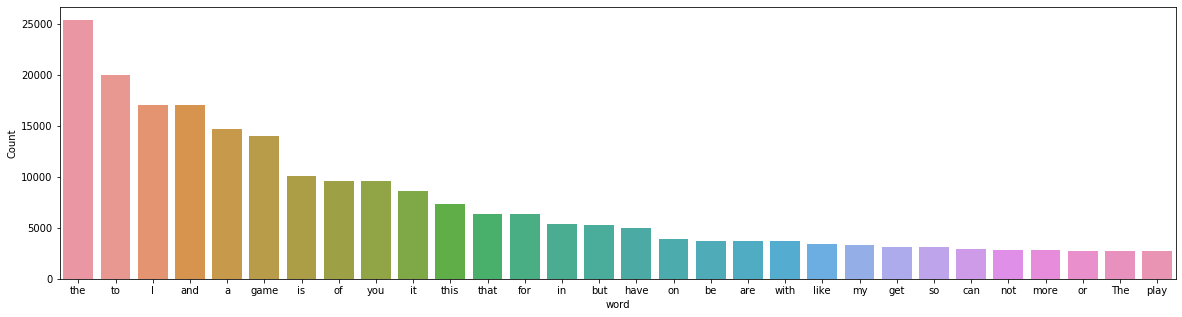

In [385]:
# Check the top frequent words
freq_words(df_best_topic['Review'])

In [386]:
# Remove unwanted characters
df_best_topic['Review'] = df_best_topic['Review'].str.replace("[^a-zA-Z#]", " ")

In [387]:
# Remove unwanted stopwords
stop_words = stopwords.words('english')
additional_list = ['game', 'games', 'play', 'app', 'screen', 'thing', 'developer', 'strategy', 'way', 'work', 'able']

In [388]:
stop_words.extend(additional_list)
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [389]:
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

In [390]:
# Remove short words (length < 3)
df_best_topic['Review'] = df_best_topic['Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# Remove stopwords from the text
best_reviews = [remove_stopwords(r.split()) for r in df_best_topic['Review']]

# Make entire text lowercase
best_reviews = [r.lower() for r in best_reviews]

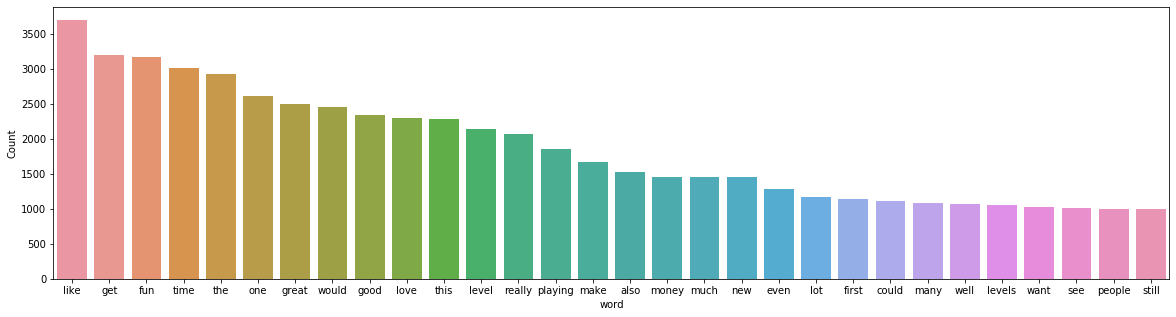

In [391]:
freq_words(best_reviews)

In [264]:
# Run the following code one time only
# !python3 -m spacy download en 

In [392]:
nlp = spacy.load('en', disable=['parser', 'ner'])

In [393]:
# Filter noun and adjective words
def lemmatization(texts, tags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [394]:
tokenized_rev = pd.Series(best_reviews).apply(lambda x: x.split())
tokenized_rev

0             [figment, dragon, slide, wonderful, smooth]
1       [good, slider, store, great, variety, board, c...
2       [title, nordic, culture, spirit, god, sacrific...
3       [much, love, depth, replay, value, amazing, wo...
4       [fantastic, world, control, clan, part, folk, ...
                              ...                        
9940    [great, gave, stars, maxed, everything, one, d...
9941    [click, vip, wash, freezes, even, internet, da...
9942                                         [super, fun]
9943                                              [great]
9944                 [really, boring, every, review, bot]
Length: 9945, dtype: object

In [395]:
best_reviews2 = lemmatization(tokenized_rev)
best_reviews2

[['figment', 'slide', 'wonderful', 'smooth'],
 ['good',
  'slider',
  'store',
  'great',
  'variety',
  'board',
  'cool',
  'picture',
  'pic'],
 ['nordic',
  'culture',
  'difference',
  'unique',
  'event',
  'decision',
  'year',
  'prosperity',
  'fascinating',
  'aspect',
  'hero',
  'leader',
  'homage',
  'event',
  'highlight',
  'year',
  'tribe',
  'great',
  'blessing',
  'leader',
  'home',
  'piece',
  'ethic',
  'tribal',
  'leader',
  'raid',
  'pillage',
  'neighbor',
  'front',
  'throne',
  'true',
  'story',
  'world',
  'character',
  'mystery',
  'music',
  'complex',
  'gameplay',
  'store',
  'curve',
  'worth',
  'investment'],
 ['much',
  'love',
  'depth',
  'replay',
  'value',
  'amazing',
  'worth',
  'large',
  'file',
  'ipad',
  'phone',
  'different',
  'device',
  'great',
  'kid',
  'interested',
  'reading',
  'different',
  'path',
  'victory',
  'mad',
  'creator',
  'second',
  'sage',
  'prequel'],
 ['clan',
  'part',
  'folk',
  'storm',
  'si

In [396]:
best_reviews3 = []
for i in range(len(best_reviews2)):
    best_reviews3.append(' '.join(best_reviews2[i]))
best_reviews3

['figment slide wonderful smooth',
 'good slider store great variety board cool picture pic',
 'nordic culture difference unique event decision year prosperity fascinating aspect hero leader homage event highlight year tribe great blessing leader home piece ethic tribal leader raid pillage neighbor front throne true story world character mystery music complex gameplay store curve worth investment',
 'much love depth replay value amazing worth large file ipad phone different device great kid interested reading different path victory mad creator second sage prequel',
 'clan part folk storm silver cattle happy many common fantasy race present unique twist nomadic rider prax horse fantastic beast xenophobic plant society foreign humanity true folk dragonewt creature form dragon eon new body race immortality great strength infertility rich intriguing lore worth time monetary investment',
 'program basic solve level ball good level bad puzzle original great',
 'new stage stellar product',
 '

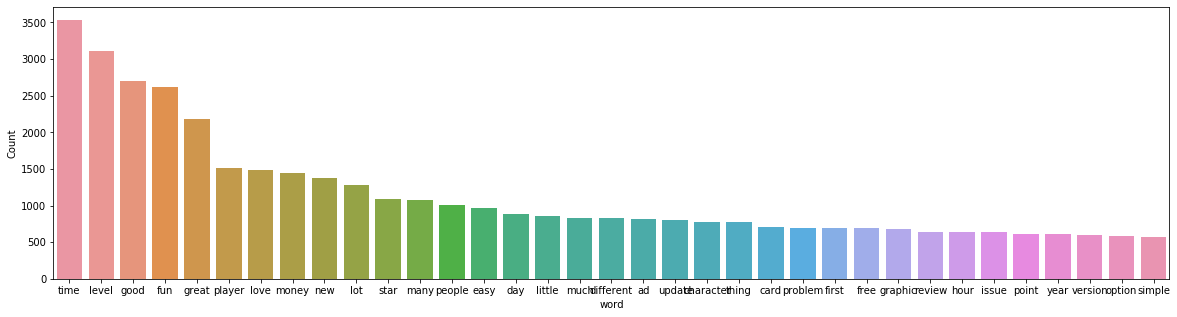

In [397]:
df_best_topic['Review'] = best_reviews3
freq_words(df_best_topic['Review'], 35)

C. Build Latent Dirichlet Allocation (LDA) model

In [398]:
dictionary = corpora.Dictionary(best_reviews2)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in best_reviews2]

In [401]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
LDA_model = LDA(corpus = doc_term_matrix, 
                id2word = dictionary, 
                num_topics = 10, 
                random_state = 100, 
                chunksize = 1000, 
                passes = 50)

In [402]:
LDA_model.print_topics()

[(0,
  '0.129*"level" + 0.027*"time" + 0.022*"star" + 0.019*"move" + 0.019*"easy" + 0.016*"fun" + 0.014*"hard" + 0.013*"difficulty" + 0.011*"chess" + 0.011*"challenge"'),
 (1,
  '0.073*"fun" + 0.049*"great" + 0.049*"time" + 0.038*"love" + 0.028*"good" + 0.019*"much" + 0.018*"graphic" + 0.017*"simple" + 0.015*"lot" + 0.013*"addictive"'),
 (2,
  '0.075*"good" + 0.033*"ship" + 0.016*"space" + 0.013*"past" + 0.013*"town" + 0.013*"job" + 0.011*"setting" + 0.010*"evolution" + 0.009*"country" + 0.009*"super"'),
 (3,
  '0.072*"puzzle" + 0.040*"score" + 0.036*"color" + 0.023*"number" + 0.021*"high" + 0.018*"background" + 0.017*"game" + 0.017*"block" + 0.013*"epic" + 0.012*"mistake"'),
 (4,
  '0.033*"player" + 0.028*"tower" + 0.021*"attack" + 0.019*"defense" + 0.017*"war" + 0.017*"monster" + 0.014*"resource" + 0.013*"alliance" + 0.012*"server" + 0.012*"hero"'),
 (5,
  '0.028*"character" + 0.017*"great" + 0.016*"mode" + 0.014*"unit" + 0.014*"different" + 0.014*"enemy" + 0.014*"one" + 0.013*"good"

D. Topic visualization

In [275]:
# Visualize the topics
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(LDA_model, doc_term_matrix, dictionary)
# vis

**Topic modeling of user reviews from bad games (1.0+1.5+2.0 rating)**

A. Text data cleaning and preprocessing

In [403]:
df_worst_topic = pd.concat([df_worst_review, df_OneDotFive_review, df_TwoDotZero_review], axis = 0)
df_worst_topic

,Game,Game_id,Review_title,Review
0,Easy Chess,412502748,Not working,Is this chess game really supposed to have a f...
1,Easy Chess,412502748,No stars,Horrible!!! To many ads interrupt and u can't ...
2,Easy Chess,412502748,Simply does not work...,Loads and quits immediately.
3,Easy Chess,412502748,Not working,Is this chess game really supposed to have a f...
4,Easy Chess,412502748,No stars,Horrible!!! To many ads interrupt and u can't ...
...,...,...,...,...
376,Idle Colony Tycoon,1463183432,Great Game!!!!,"I just started this, and I am so happy it’s no..."
377,Idle Colony Tycoon,1463183432,glitchy,it was really cool until all the sudden my upg...
378,CarWash Tycoon,1464890113,Was looking forward :(,It won’t even let me open the app. I have dele...
379,CarWash Tycoon,1464890113,Save data,I played the game for an hour straight had got...


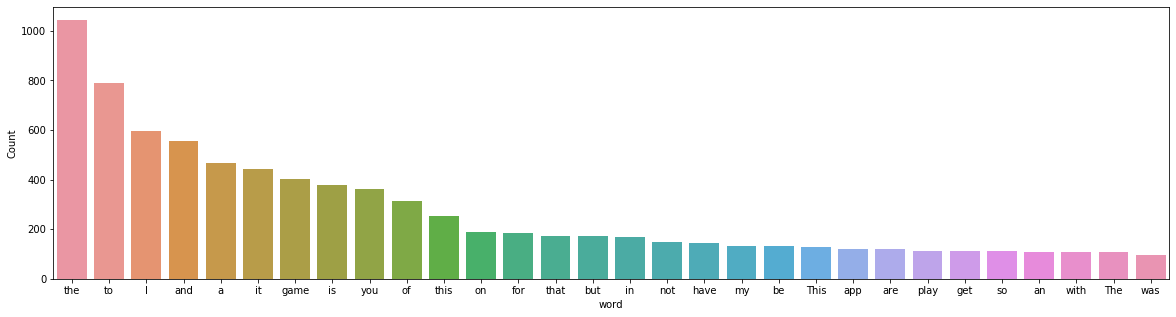

In [404]:
# Check the top frequent words
freq_words(df_worst_topic['Review'])

In [405]:
# Remove unwanted characters
df_worst_topic['Review'] = df_worst_topic['Review'].str.replace("[^a-zA-Z#]", " ")

In [406]:
stop_words 

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [407]:
# Remove short words (length < 3)
df_worst_topic['Review'] = df_worst_topic['Review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# Remove stopwords from the text
worst_reviews = [remove_stopwords(r.split()) for r in df_worst_topic['Review']]

# Make entire text lowercase
worst_reviews = [r.lower() for r in worst_reviews]

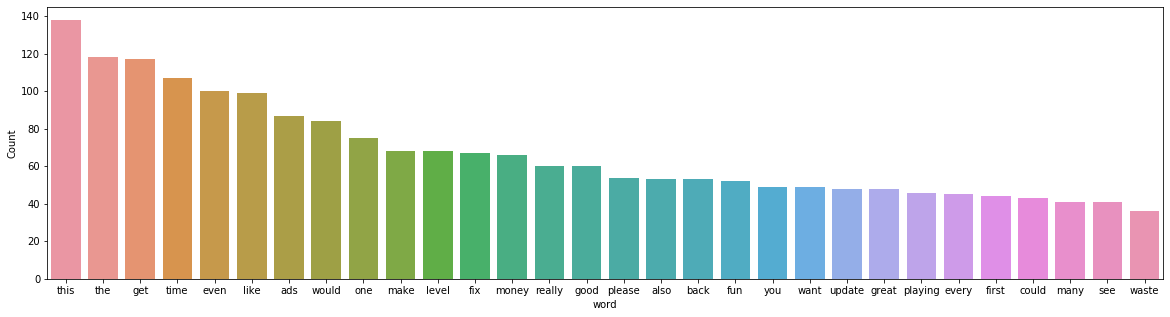

In [408]:
freq_words(worst_reviews)

In [409]:
tokenized_rev_bad = pd.Series(worst_reviews).apply(lambda x: x.split())
tokenized_rev_bad

0      [chess, really, supposed, file, size, impressi...
1           [horrible, many, ads, interrupt, even, slow]
2                            [loads, quits, immediately]
3      [chess, really, supposed, file, size, impressi...
4           [horrible, many, ads, interrupt, even, slow]
                             ...                        
549    [started, happy, another, infested, but, probl...
550    [really, cool, sudden, upgrades, improving, mu...
551    [even, let, open, deleted, reinstalled, shut, ...
552    [played, hour, straight, gotten, far, want, pu...
553    [even, open, crashes, every, single, time, cli...
Length: 554, dtype: object

In [410]:
worst_reviews2 = lemmatization(tokenized_rev_bad)
worst_reviews2

[['chess', 'file', 'size', 'impressive', 'programming', 'crash'],
 ['horrible', 'many', 'ad'],
 ['load'],
 ['chess', 'file', 'size', 'impressive', 'programming', 'crash'],
 ['horrible', 'many', 'ad'],
 ['load'],
 ['instruction',
  'setting',
  'different',
  'language',
  'difficult',
  'use',
  'plan',
  'download',
  'waste',
  'money'],
 ['design',
  'setting',
  'foreign',
  'language',
  'option',
  'export',
  'readability',
  'device'],
 ['complete', 'waste', 'time', 'money', 'many', 'none'],
 ['excited',
  'function',
  'lot',
  'potential',
  'current',
  'state',
  'fun',
  'impossible',
  'follow',
  'list',
  'computer',
  'opponent',
  'fast',
  'end',
  'reading',
  'manuscript',
  'order',
  'dark',
  'key',
  'element',
  'second',
  'company',
  'ton',
  'potential',
  'hope',
  'update',
  'change',
  'worth',
  'money'],
 ['creator',
  'board',
  'simple',
  'fun',
  'acquire',
  'drop',
  'quality',
  'extent',
  'part',
  'bad',
  'dollar',
  'review'],
 ['love',
 

In [411]:
worst_reviews3 = []
for i in range(len(worst_reviews2)):
    worst_reviews3.append(' '.join(worst_reviews2[i]))
worst_reviews3

['chess file size impressive programming crash',
 'horrible many ad',
 'load',
 'chess file size impressive programming crash',
 'horrible many ad',
 'load',
 'instruction setting different language difficult use plan download waste money',
 'design setting foreign language option export readability device',
 'complete waste time money many none',
 'excited function lot potential current state fun impossible follow list computer opponent fast end reading manuscript order dark key element second company ton potential hope update change worth money',
 'creator board simple fun acquire drop quality extent part bad dollar review',
 'love borderline unusable version many share opponent hard know nonsense option well luck next time',
 'puzzle clue pick bizarre tour baked scenery sound effect connection high',
 'company ashamed app store piece garbage',
 'tap jump scare house puzzle point',
 'good unit dead hit time combat leave combat ipad fix update star fix bug',
 'review issue update issu

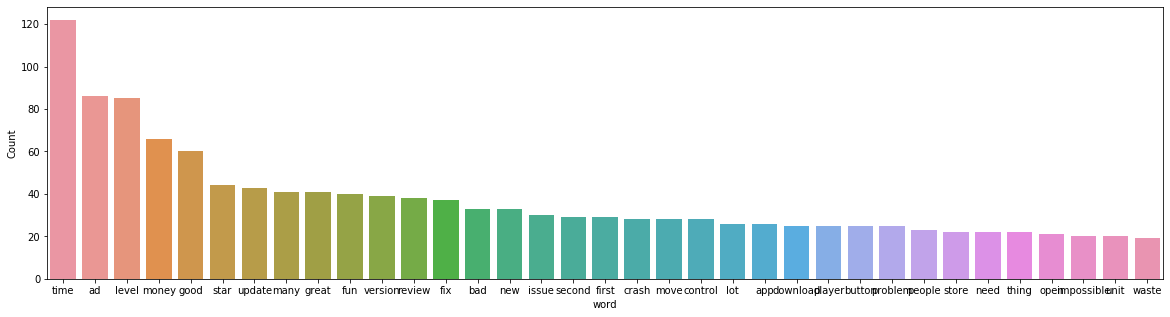

In [412]:
df_worst_topic['Review'] = worst_reviews3
freq_words(df_worst_topic['Review'], 35)

B. Build Latent Dirichlet Allocation (LDA) model

In [413]:
dictionary_worst = corpora.Dictionary(worst_reviews2)
doc_term_matrix_worst = [dictionary_worst.doc2bow(rev) for rev in worst_reviews2]

In [424]:
# Build LDA model
LDA_model_worst = LDA(corpus = doc_term_matrix_worst, 
                id2word = dictionary_worst, 
                num_topics = 10, 
                random_state = 100, 
                chunksize = 500, 
                passes = 50)

In [425]:
LDA_model_worst.print_topics()

[(0,
  '0.080*"level" + 0.034*"gold" + 0.027*"right" + 0.020*"cube" + 0.020*"stuff" + 0.020*"thank" + 0.018*"error" + 0.018*"pop" + 0.016*"building" + 0.015*"computer"'),
 (1,
  '0.064*"time" + 0.040*"first" + 0.030*"open" + 0.028*"single" + 0.026*"glitch" + 0.025*"level" + 0.022*"fix" + 0.020*"crap" + 0.018*"phone" + 0.016*"board"'),
 (2,
  '0.050*"card" + 0.040*"download" + 0.035*"review" + 0.034*"good" + 0.032*"game" + 0.027*"life" + 0.026*"name" + 0.023*"prestige" + 0.023*"bad" + 0.017*"iphone"'),
 (3,
  '0.045*"level" + 0.032*"crash" + 0.028*"upgrade" + 0.028*"update" + 0.025*"money" + 0.025*"time" + 0.024*"building" + 0.022*"app" + 0.020*"ship" + 0.018*"great"'),
 (4,
  '0.053*"top" + 0.029*"issue" + 0.029*"good" + 0.026*"purchase" + 0.025*"idea" + 0.022*"developer" + 0.022*"update" + 0.019*"playstation" + 0.017*"thing" + 0.016*"hard"'),
 (5,
  '0.027*"user" + 0.026*"place" + 0.023*"terrible" + 0.023*"watch" + 0.018*"option" + 0.016*"quality" + 0.015*"unit" + 0.015*"love" + 0.014

**Predictive Modeling for Ratings**

A. Dataset preprocessing

In [11]:
df2.head(5)

,URL,ID,Name,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,0,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,0,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,0,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,0,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,0,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [12]:
df2.dtypes

URL                              object
ID                                int64
Name                             object
Icon URL                         object
Average User Rating             float64
User Rating Count               float64
Price                           float64
In-app Purchases                 object
Description                      object
Developer                        object
Age Rating                       object
Languages                        object
Size                            float64
Genres                           object
Original Release Date            object
Current Version Release Date     object
dtype: object

In [13]:
#export_csv = df2.to_csv (r'export_d2.csv', index = None, header = True)

In [14]:
# Drop columns
df3 = df2.drop(['URL', 'ID', 'Icon URL', 'Description', 'Developer'], axis = 1)

In [15]:
# Recode the dependent variable - rating into 2 categories
df3.loc[df3['Average User Rating'] >= 4.5, 'top_game'] = 1
df3.loc[df3['Average User Rating'] <= 4.0, 'top_game'] = 0

In [16]:
# Recode name to the length of name
df3['name_length'] = df3['Name'].str.len()

In [17]:
# Recode in-app purchase to the total in-app purchase amount
total_in_app = []
for j in df3['In-app Purchases']:
    if type(j) != int:
        k = j.split(', ')
        l = pd.to_numeric(k)
        total_in_app.append(sum(l).round(2))
    else:
        total_in_app.append(j)

In [18]:
df3['total_in_app_purchase'] = total_in_app

In [19]:
# Recode the age rating to minimun age requirement
df3.loc[df3['Age Rating'] == '4+', 'min_age'] = 4
df3.loc[df3['Age Rating'] == '9+', 'min_age'] = 9
df3.loc[df3['Age Rating'] == '12+', 'min_age'] = 12
df3.loc[df3['Age Rating'] == '17+', 'min_age'] = 17

In [20]:
# Recode language to number of language
num_lang = []
for i in df3['Languages']:
    j = i.split(', ')
    num_lang.append(len(j))

In [21]:
df3['lang_num'] = num_lang

In [22]:
# Recode genres by removing 'games' and 'strategy', then count number of genres 
df3['genres_list'] = df3['Genres'].apply(lambda s : s.replace('Games','').replace('Strategy', '').replace('&',' ').replace(',', ' ').split())

In [23]:
df3['genres_num'] = [len(i) for i in df3['genres_list']]

In [24]:
# Recode the date information to update duration
df3['Original Release Date'] = pd.to_datetime(df3['Original Release Date'], format = '%d/%m/%Y')
df3['Current Version Release Date'] = pd.to_datetime(df3['Current Version Release Date'], format = '%d/%m/%Y')

In [25]:
df3['update_duration'] = df3['Current Version Release Date'] - df3['Original Release Date']
df3['update_duration'] = df3['update_duration'].astype('timedelta64[D]').astype(int)

In [26]:
collection_time = pd.to_datetime('08/03/2019', format = '%m/%d/%Y')
collection_time

Timestamp('2019-08-03 00:00:00')

In [27]:
df3['release_duration'] = collection_time - df3['Original Release Date']
df3['release_duration'] = df3['release_duration'].astype('timedelta64[D]').astype(int)

In [28]:
df3.head(5)

,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Age Rating,Languages,Size,Genres,Original Release Date,Current Version Release Date,top_game,name_length,total_in_app_purchase,min_age,lang_num,genres_list,genres_num,update_duration,release_duration
0,Sudoku,4.0,3553.0,2.99,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,"Games, Strategy, Puzzle",2008-07-11,2017-05-30,0.0,6,0.0,4.0,17,[Puzzle],1,3245,4040
1,Reversi,3.5,284.0,1.99,0,4+,EN,12328960.0,"Games, Strategy, Board",2008-07-11,2018-05-17,0.0,7,0.0,4.0,1,[Board],1,3597,4040
2,Morocco,3.0,8376.0,0.00,0,4+,EN,674816.0,"Games, Board, Strategy",2008-07-11,2017-09-05,0.0,7,0.0,4.0,1,[Board],1,3343,4040
3,Sudoku (Free),3.5,190394.0,0.00,0,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,0.0,13,0.0,4.0,17,[Puzzle],1,3233,4028
4,Senet Deluxe,3.5,28.0,2.99,0,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,"Games, Strategy, Board, Education",2008-07-18,2018-07-22,0.0,12,0.0,4.0,15,"[Board, Education]",2,3656,4033


In [29]:
#export_csv = df3.to_csv (r'export_d3.csv', index = None, header = True)

In [30]:
df4 = df3[['top_game', 'Price', 'Size', 'name_length', 'total_in_app_purchase', 
           'min_age', 'lang_num', 'genres_num', 'update_duration', 'release_duration']]

In [31]:
df4.dtypes

top_game                 float64
Price                    float64
Size                     float64
name_length                int64
total_in_app_purchase    float64
min_age                  float64
lang_num                   int64
genres_num                 int64
update_duration            int64
release_duration           int64
dtype: object

In [32]:
df4.head(5)

,top_game,Price,Size,name_length,total_in_app_purchase,min_age,lang_num,genres_num,update_duration,release_duration
0,0.0,2.99,15853568.0,6,0.0,4.0,17,1,3245,4040
1,0.0,1.99,12328960.0,7,0.0,4.0,1,1,3597,4040
2,0.0,0.00,674816.0,7,0.0,4.0,1,1,3343,4040
3,0.0,0.00,21552128.0,13,0.0,4.0,17,1,3233,4028
4,0.0,2.99,34689024.0,12,0.0,4.0,15,2,3656,4033


In [33]:
df4['top_game'].value_counts()

1.0    3851
0.0    3710
Name: top_game, dtype: int64

In [38]:
#export_csv = df4.to_csv (r'export_model_data.csv', index = None, header = True)

B. Feature selection via correlation coefficients and p-values

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

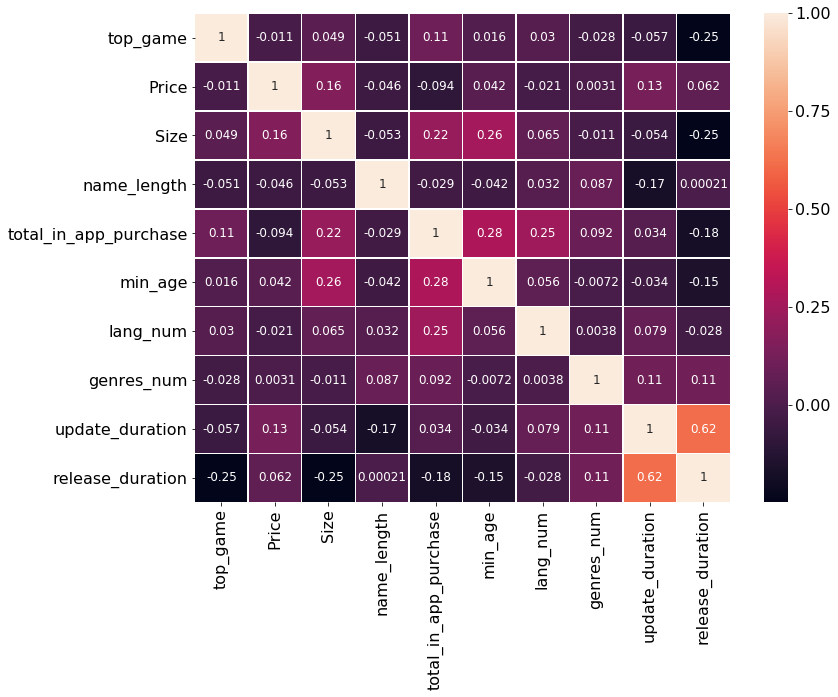

In [170]:
plt.figure(figsize = (12, 9))
sns.heatmap(df4.corr(),annot = True, linewidths = 0.5, annot_kws={"size":12})
## Due to the bug in current version of matplotlib (3.1.1), 
## the following codes were applied to avoid cut-off of the top and bottom boxes
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

In [41]:
from scipy import stats

In [42]:
df4_corr = pd.DataFrame() 
df4_p = pd.DataFrame()  
for x in df4.columns:
    for y in df4.columns:
        corr = stats.pearsonr(df4[x], df4[y])
        df4_corr.loc[x,y] = corr[0]
        df4_p.loc[x,y] = corr[1]

In [43]:
df4_corr['top_game']

top_game                 1.000000
Price                   -0.010612
Size                     0.048810
name_length             -0.050888
total_in_app_purchase    0.106886
min_age                  0.015624
lang_num                 0.029974
genres_num              -0.027620
update_duration         -0.056886
release_duration        -0.247693
Name: top_game, dtype: float64

In [44]:
df4_p['top_game']

top_game                  0.000000e+00
Price                     3.562137e-01
Size                      2.175272e-05
name_length               9.553334e-06
total_in_app_purchase     1.170882e-20
min_age                   1.743314e-01
lang_num                  9.146931e-03
genres_num                1.631783e-02
update_duration           7.433527e-07
release_duration         4.387974e-106
Name: top_game, dtype: float64

In [65]:
# Drop the price and min_age
df5 = df4.copy()
df5 = df5.drop(['Price', 'min_age'], axis = 1)

In [66]:
df5.head(5)

,top_game,Size,name_length,total_in_app_purchase,lang_num,genres_num,update_duration,release_duration
0,0.0,15853568.0,6,0.0,17,1,3245,4040
1,0.0,12328960.0,7,0.0,1,1,3597,4040
2,0.0,674816.0,7,0.0,1,1,3343,4040
3,0.0,21552128.0,13,0.0,17,1,3233,4028
4,0.0,34689024.0,12,0.0,15,2,3656,4033


In [67]:
df5.isnull().sum()

top_game                 0
Size                     0
name_length              0
total_in_app_purchase    0
lang_num                 0
genres_num               0
update_duration          0
release_duration         0
dtype: int64

In [68]:
df5['top_game'].value_counts()

1.0    3851
0.0    3710
Name: top_game, dtype: int64

C. Data partition

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
# Set up random seed
RSEED = 123

In [71]:
# Extract labels
labels = np.array(df5.pop('top_game'))

In [72]:
# Data partition - 25% as testing, 75% as training
train, test, train_labels, test_labels = train_test_split(df5, labels, 
                                                          stratify = labels,
                                                          test_size = 0.25, 
                                                          random_state = RSEED)

In [73]:
# Features for feature importances
features = list(train.columns)

In [77]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

In [78]:
# Define function of model evaluation
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

In [80]:
from sklearn.metrics import confusion_matrix
import itertools

In [81]:
# Define function for confusion matrix construction
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)


    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)
    b, t = plt.ylim() 
    b += 0.5 
    t -= 0.5 
    plt.ylim(b, t) 
    plt.show()

- Logistic Regression (not used)

In [119]:
# from sklearn.linear_model import LogisticRegression

In [128]:
# lr = LogisticRegression(random_state = RSEED, solver='liblinear', verbose = 1)
# Fit 
# lr.fit(train, train_labels)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='liblinear', tol=0.0001, verbose=1,
                   warm_start=False)

In [129]:
# train_lr_predictions = lr.predict(train)
# train_lr_probs = lr.predict_proba(train)[:, 1]

# lr_predictions = lr.predict(test)
# lr_probs = lr.predict_proba(test)[:, 1]

Recall Baseline: 1.0 Test: 1.0 Train: 1.0
Precision Baseline: 0.51 Test: 0.51 Train: 0.51
Roc Baseline: 0.5 Test: 0.59 Train: 0.58


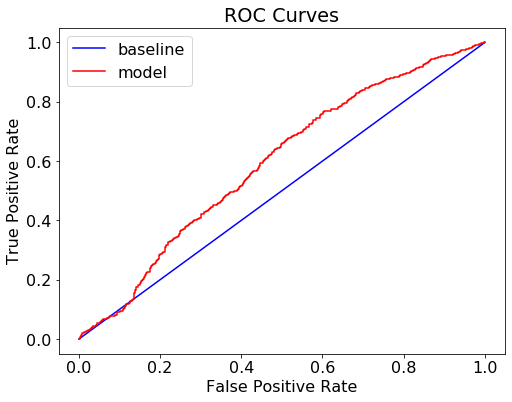

In [130]:
# evaluate_model(lr_predictions, lr_probs, train_lr_predictions, train_lr_probs)

Confusion matrix, without normalization
[[  0 928]
 [  0 963]]


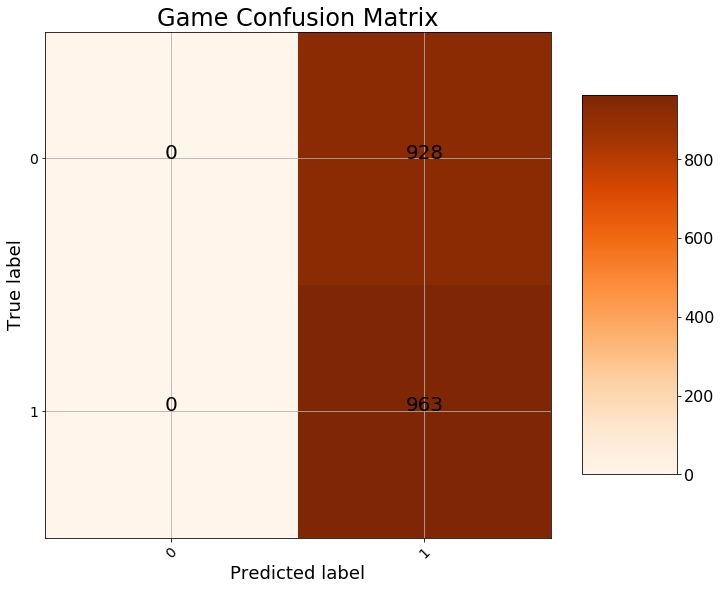

In [131]:
# cm_lr = confusion_matrix(test_labels, lr_predictions)
# plot_confusion_matrix(cm_lr, classes = ['0', '1'],
#                       title = 'Game Confusion Matrix')

- Benchmark Naive Bayes

In [171]:
df4

,top_game,Price,Size,name_length,total_in_app_purchase,min_age,lang_num,genres_num,update_duration,release_duration
0,0.0,2.99,15853568.0,6,0.0,4.0,17,1,3245,4040
1,0.0,1.99,12328960.0,7,0.0,4.0,1,1,3597,4040
2,0.0,0.00,674816.0,7,0.0,4.0,1,1,3343,4040
3,0.0,0.00,21552128.0,13,0.0,4.0,17,1,3233,4028
4,0.0,2.99,34689024.0,12,0.0,4.0,15,2,3656,4033
...,...,...,...,...,...,...,...,...,...,...
16950,0.0,0.00,151308288.0,8,0.0,12.0,2,2,0,3
16956,1.0,0.00,79646720.0,11,0.0,4.0,1,2,0,11
16962,1.0,0.00,125348864.0,18,0.0,9.0,1,1,0,3
16967,1.0,0.00,128687104.0,18,0.0,4.0,1,1,0,6


In [173]:
# Set up random seed
RSEED_b = 12345
# Extract labels
b_labels = np.array(df4.pop('top_game'))
# Data partition - 25% as testing, 75% as training
b_train, b_test, b_train_labels, b_test_labels = train_test_split(df4, b_labels, 
                                                          stratify = b_labels,
                                                          test_size = 0.25, 
                                                          random_state = RSEED_b)

In [174]:
from sklearn.naive_bayes import GaussianNB

In [175]:
b_gnb = GaussianNB()
# Fit 
b_gnb.fit(b_train, b_train_labels)

GaussianNB(priors=None, var_smoothing=1e-09)

In [176]:
train_b_gnb_predictions = b_gnb.predict(b_train)
train_b_gnb_probs = b_gnb.predict_proba(b_train)[:, 1]

b_gnb_predictions = b_gnb.predict(b_test)
b_gnb_probs = b_gnb.predict_proba(b_test)[:, 1]

Recall Baseline: 1.0 Test: 0.33 Train: 0.33
Precision Baseline: 0.51 Test: 0.51 Train: 0.51
Roc Baseline: 0.5 Test: 0.51 Train: 0.5


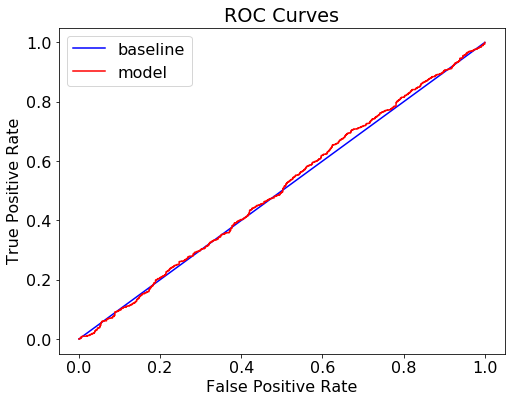

In [177]:
evaluate_model(b_gnb_predictions, b_gnb_probs, train_b_gnb_predictions, train_b_gnb_probs)

Confusion matrix, without normalization
[[659 269]
 [614 349]]


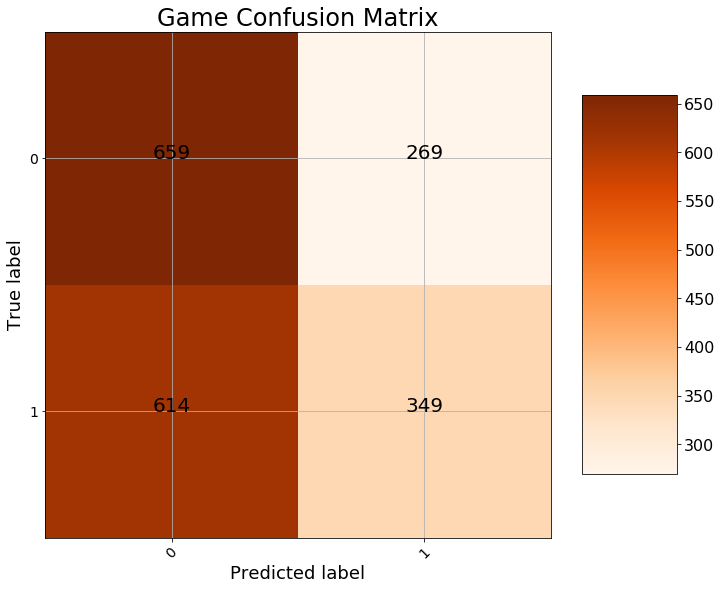

In [178]:
cm_b_gnb = confusion_matrix(b_test_labels, b_gnb_predictions)
plot_confusion_matrix(cm_b_gnb, classes = ['0', '1'],
                      title = 'Game Confusion Matrix')

- Naive Bayes

In [104]:
from sklearn.naive_bayes import GaussianNB

In [105]:
gnb = GaussianNB()
# Fit 
gnb.fit(train, train_labels)

GaussianNB(priors=None, var_smoothing=1e-09)

In [106]:
train_gnb_predictions = gnb.predict(train)
train_gnb_probs = gnb.predict_proba(train)[:, 1]

gnb_predictions = gnb.predict(test)
gnb_probs = gnb.predict_proba(test)[:, 1]

Recall Baseline: 1.0 Test: 0.93 Train: 0.94
Precision Baseline: 0.51 Test: 0.54 Train: 0.54
Roc Baseline: 0.5 Test: 0.61 Train: 0.6


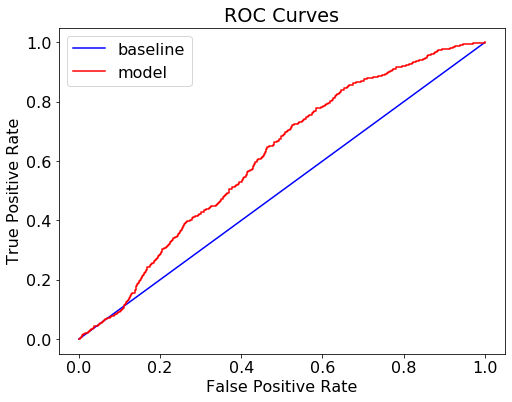

In [109]:
evaluate_model(gnb_predictions, gnb_probs, train_gnb_predictions, train_gnb_probs)

Confusion matrix, without normalization
[[160 768]
 [ 63 900]]


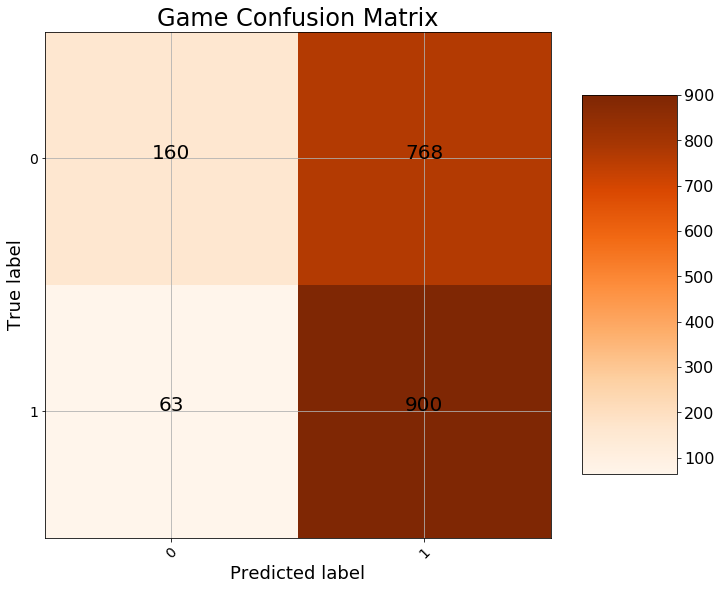

In [111]:
cm_gnb = confusion_matrix(test_labels, gnb_predictions)
plot_confusion_matrix(cm_gnb, classes = ['0', '1'],
                      title = 'Game Confusion Matrix')

- Decision Tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = RSEED)

In [75]:
tree.fit(train, train_labels)
# print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 2791 nodes with maximum depth 29.


In [76]:
# Evaluate model performance
train_predictions = tree.predict(train)
train_probs = tree.predict_proba(train)[:, 1]

predictions = tree.predict(test)
probs = tree.predict_proba(test)[:, 1]

Recall Baseline: 1.0 Test: 0.61 Train: 1.0
Precision Baseline: 0.51 Test: 0.61 Train: 1.0
Roc Baseline: 0.5 Test: 0.6 Train: 1.0


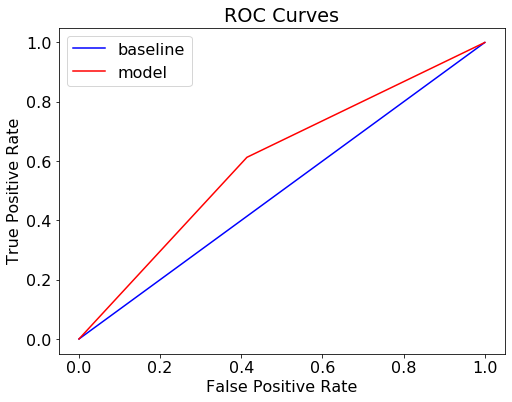

In [79]:
evaluate_model(predictions, probs, train_predictions, train_probs)

In [82]:
cm_tree = confusion_matrix(test_labels, predictions)

Confusion matrix, without normalization
[[544 384]
 [373 590]]


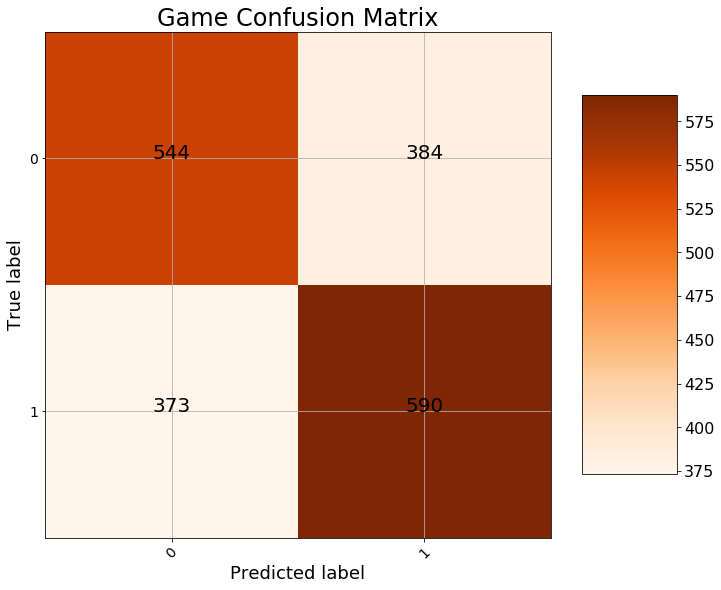

In [83]:
plot_confusion_matrix(cm_tree, classes = ['0', '1'],
                      title = 'Game Confusion Matrix')

In [84]:
# Feature importance
imp_tree = pd.DataFrame({'feature': features,
                   'importance': tree.feature_importances_}).\
                    sort_values('importance', ascending = False)
imp_tree

,feature,importance
6,release_duration,0.255669
0,Size,0.220866
5,update_duration,0.171329
1,name_length,0.134710
2,total_in_app_purchase,0.125103
3,lang_num,0.061567
4,genres_num,0.030755


- Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

In [86]:
# Fit on training data
rf.fit(train, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=1,
                       warm_start=False)

In [87]:
train_rf_predictions = rf.predict(train)
train_rf_probs = rf.predict_proba(train)[:, 1]

rf_predictions = rf.predict(test)
rf_probs = rf.predict_proba(test)[:, 1]

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Recall Baseline: 1.0 Test: 0.7 Train: 1.0
Precision Baseline: 0.51 Test: 0.64 Train: 1.0
Roc Baseline: 0.5 Test: 0.7 Train: 1.0


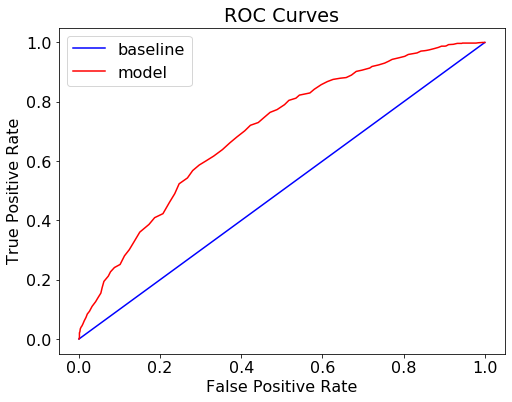

In [88]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

Confusion matrix, without normalization
[[549 379]
 [287 676]]


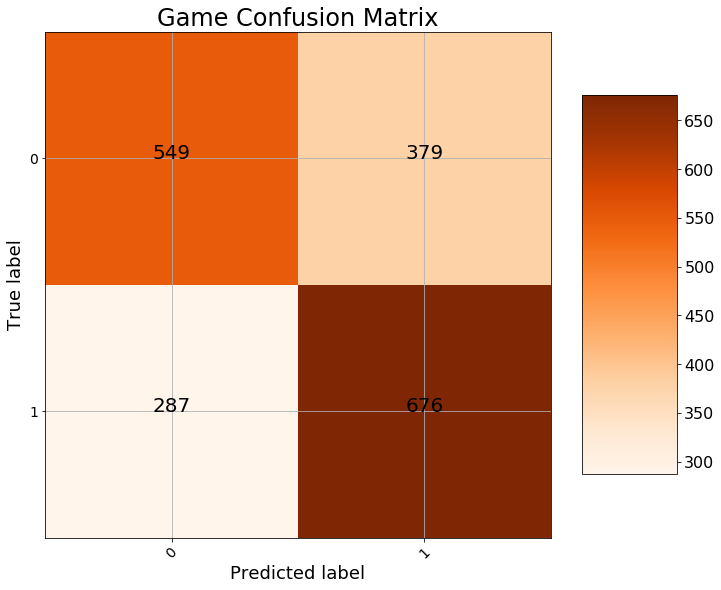

In [89]:
cm_rf = confusion_matrix(test_labels, rf_predictions)
plot_confusion_matrix(cm_rf, classes = ['0', '1'],
                      title = 'Game Confusion Matrix')

In [90]:
imp_rf = pd.DataFrame({'feature': features,
                   'importance': rf.feature_importances_}).\
                    sort_values('importance', ascending = False)
imp_rf

,feature,importance
6,release_duration,0.242340
0,Size,0.207393
5,update_duration,0.171914
1,name_length,0.146059
2,total_in_app_purchase,0.129565
3,lang_num,0.061127
4,genres_num,0.041602


- Random Forest with optimization

In [91]:
from sklearn.model_selection import RandomizedSearchCV

In [112]:
# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

In [113]:
# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rfs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 20, 
                        n_iter = 20, verbose = 1, random_state=RSEED)

# Fit 
rfs.fit(train, train_labels)

Fitting 20 folds for each of 20 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   31.2s finished


RandomizedSearchCV(cv=20, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

In [114]:
rfs.best_params_

{'n_estimators': 134,
 'min_samples_split': 10,
 'max_leaf_nodes': 48,
 'max_features': 'auto',
 'max_depth': 18,
 'bootstrap': True}

In [115]:
optimized_rf = rfs.best_estimator_

In [116]:
train_rfs_predictions = optimized_rf.predict(train)
train_rfs_probs = optimized_rf.predict_proba(train)[:, 1]

rfs_predictions = optimized_rf.predict(test)
rfs_probs = optimized_rf.predict_proba(test)[:, 1]

Recall Baseline: 1.0 Test: 0.73 Train: 0.8
Precision Baseline: 0.51 Test: 0.62 Train: 0.68
Roc Baseline: 0.5 Test: 0.69 Train: 0.78


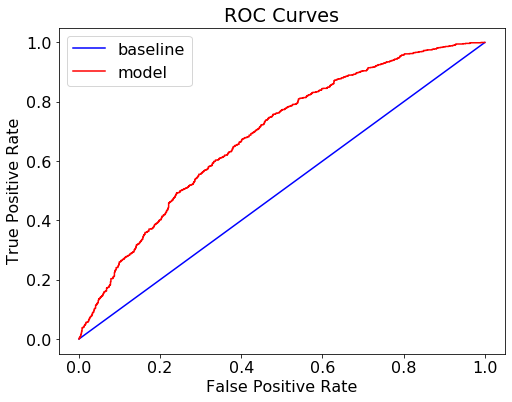

In [117]:
evaluate_model(rfs_predictions, rfs_probs, train_rfs_predictions, train_rfs_probs)

Confusion matrix, without normalization
[[503 425]
 [257 706]]


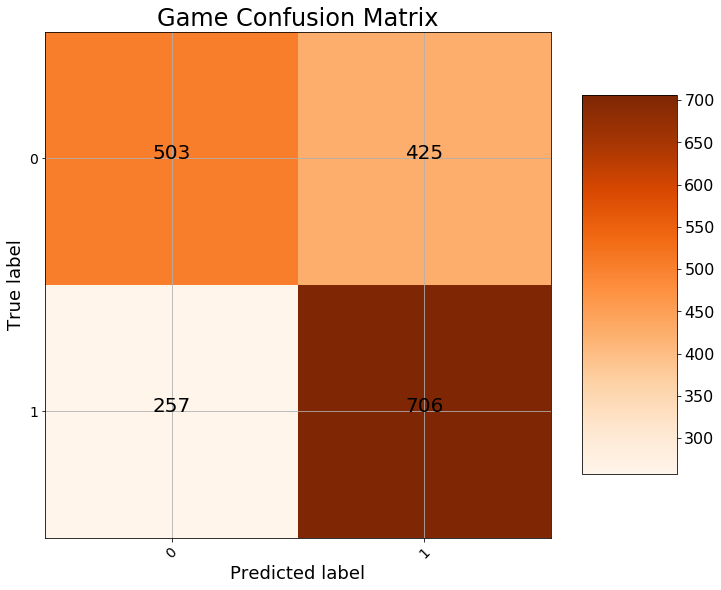

In [118]:
cm_rfs = confusion_matrix(test_labels, rfs_predictions)
plot_confusion_matrix(cm_rfs, classes = ['0', '1'],
                      title = 'Game Confusion Matrix')

In [134]:
imp_rfs = pd.DataFrame({'feature': features,
                   'importance': optimized_rf.feature_importances_}).\
                    sort_values('importance', ascending = False)
imp_rfs

,feature,importance
6,release_duration,0.367781
0,Size,0.175407
2,total_in_app_purchase,0.155082
5,update_duration,0.144821
1,name_length,0.094085
3,lang_num,0.045074
4,genres_num,0.017751


In [153]:
# Hyperparameter grid
param_grid2 = {
    'n_estimators': np.linspace(10, 1000).astype(int),
    'max_depth': [None] + list(np.linspace(3, 100).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_leaf': [5, 20, 50],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

In [154]:
rfs2 = RandomizedSearchCV(estimator, param_grid2, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 5, 
                        n_iter = 100, verbose = 2, random_state=RSEED)

# Fit 
rfs2.fit(train, train_labels)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.5min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [155]:
rfs2.best_params_

{'n_estimators': 232,
 'min_samples_split': 10,
 'min_samples_leaf': 20,
 'max_leaf_nodes': 42,
 'max_features': 0.7999999999999999,
 'max_depth': 96,
 'bootstrap': True}

In [156]:
optimized_rf2 = rfs2.best_estimator_

In [157]:
train_rfs2_predictions = optimized_rf2.predict(train)
train_rfs2_probs = optimized_rf2.predict_proba(train)[:, 1]

rfs2_predictions = optimized_rf2.predict(test)
rfs2_probs = optimized_rf2.predict_proba(test)[:, 1]

Recall Baseline: 1.0 Test: 0.73 Train: 0.78
Precision Baseline: 0.51 Test: 0.62 Train: 0.67
Roc Baseline: 0.5 Test: 0.69 Train: 0.77


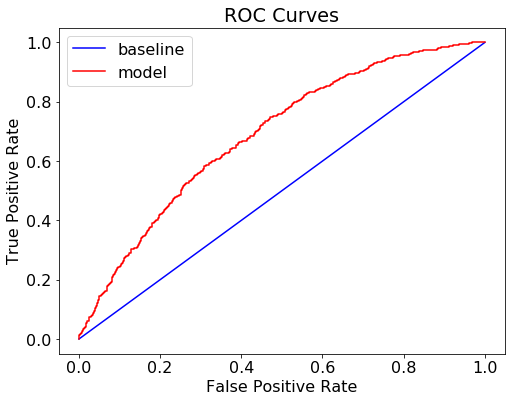

In [158]:
evaluate_model(rfs2_predictions, rfs2_probs, train_rfs2_predictions, train_rfs2_probs)

Confusion matrix, without normalization
[[507 421]
 [262 701]]


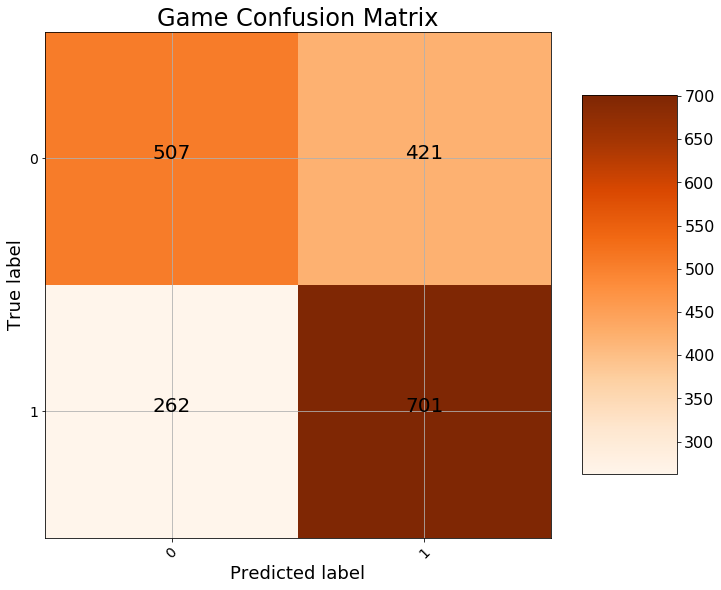

In [159]:
cm_rfs2 = confusion_matrix(test_labels, rfs2_predictions)
plot_confusion_matrix(cm_rfs2, classes = ['0', '1'],
                      title = 'Game Confusion Matrix')

In [160]:
imp_rfs2 = pd.DataFrame({'feature': features,
                   'importance': optimized_rf2.feature_importances_}).\
                    sort_values('importance', ascending = False)
imp_rfs2

,feature,importance
6,release_duration,0.435910
0,Size,0.158005
5,update_duration,0.147155
2,total_in_app_purchase,0.133703
1,name_length,0.085568
3,lang_num,0.029927
4,genres_num,0.009732


In [164]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

In [179]:
# Export one tree from the forest with best parameter
rfs2_estimator = optimized_rf2.estimators_[1]

export_graphviz(rfs2_estimator, 'tree_from_optimized_forest.dot', rounded = True, 
                feature_names=train.columns, max_depth = 3, 
                class_names = ['0', '1'], filled = True)

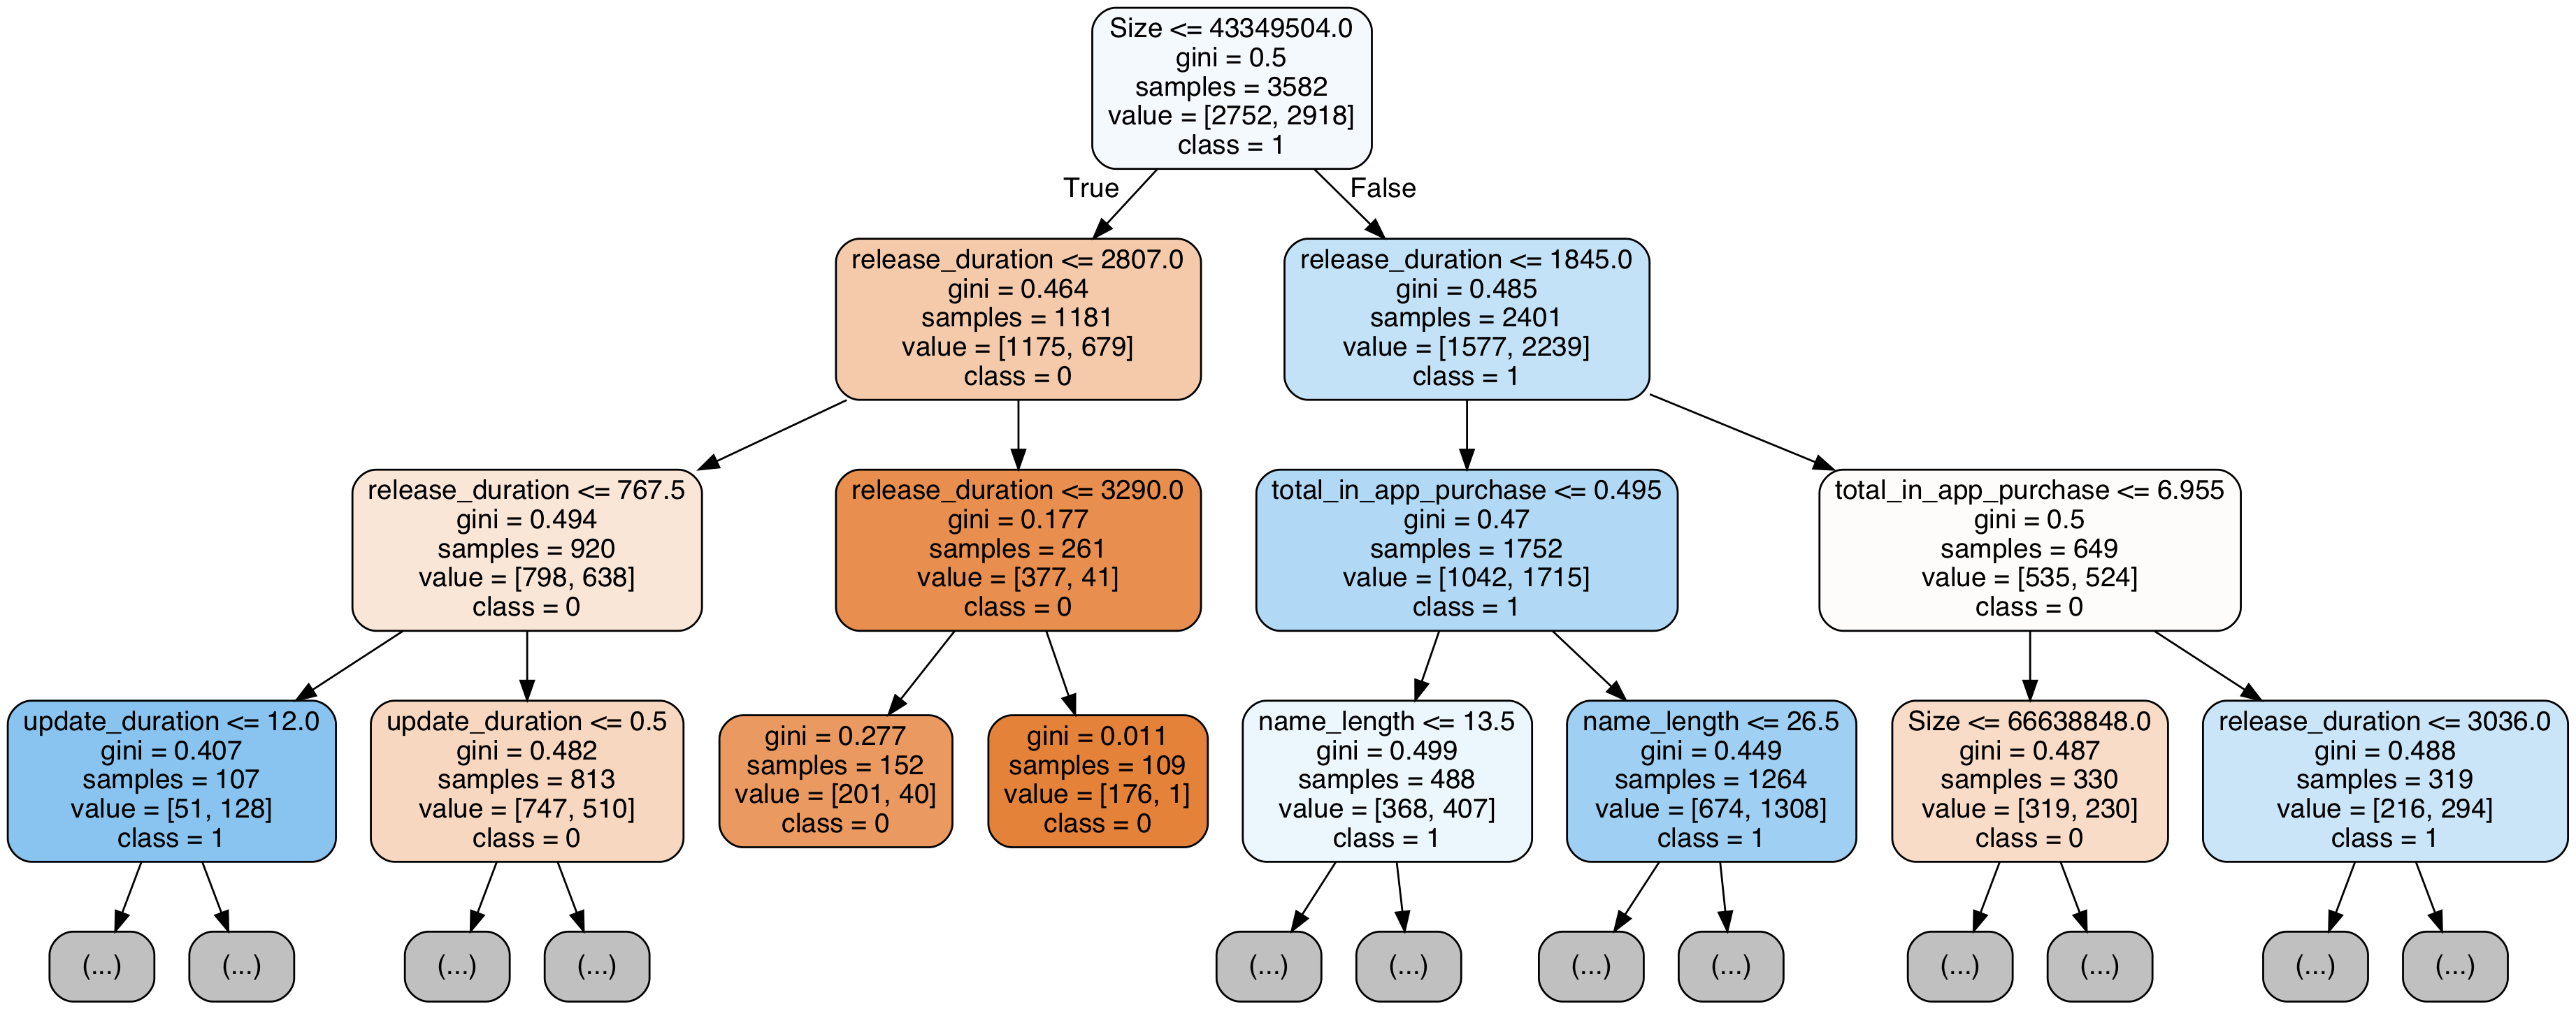

In [180]:
call(['dot', '-Tpng', 'tree_from_optimized_forest.dot', '-o', 'tree_from_optimized_forest.png', '-Gdpi=200'])
Image('tree_from_optimized_forest.png')